# House Price  Prediction

## Exploratory Data Analysis 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

#instead of using plt.show() everytime
%matplotlib inline

# We are using whitegrid style background  for our seaborn plots.
sns.set_style(style = 'darkgrid')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Finding Missing Values

<Axes: >

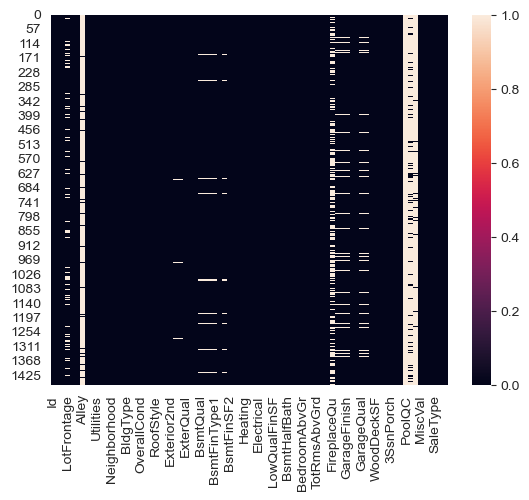

In [5]:
sns.heatmap(df.isnull())

We have lot of missing values to handle 

In [6]:
col_with_na=[col for col in df.columns if df[col].isnull().sum()>1]
col_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for col in col_with_na:
    a=df[col].isnull().sum()
    print('{} and the precentage of missing values is=> {}'.format(col,a/1460))
    ## here the 1460 is the total number of rows in the traing Dataset

LotFrontage and the precentage of missing values is=> 0.1773972602739726
Alley and the precentage of missing values is=> 0.9376712328767123
MasVnrType and the precentage of missing values is=> 0.005479452054794521
MasVnrArea and the precentage of missing values is=> 0.005479452054794521
BsmtQual and the precentage of missing values is=> 0.025342465753424658
BsmtCond and the precentage of missing values is=> 0.025342465753424658
BsmtExposure and the precentage of missing values is=> 0.026027397260273973
BsmtFinType1 and the precentage of missing values is=> 0.025342465753424658
BsmtFinType2 and the precentage of missing values is=> 0.026027397260273973
FireplaceQu and the precentage of missing values is=> 0.4726027397260274
GarageType and the precentage of missing values is=> 0.05547945205479452
GarageYrBlt and the precentage of missing values is=> 0.05547945205479452
GarageFinish and the precentage of missing values is=> 0.05547945205479452
GarageQual and the precentage of missing valu

There are lot of missing values Let find the Relationship between the missing values and the depentent variable(Sales price)

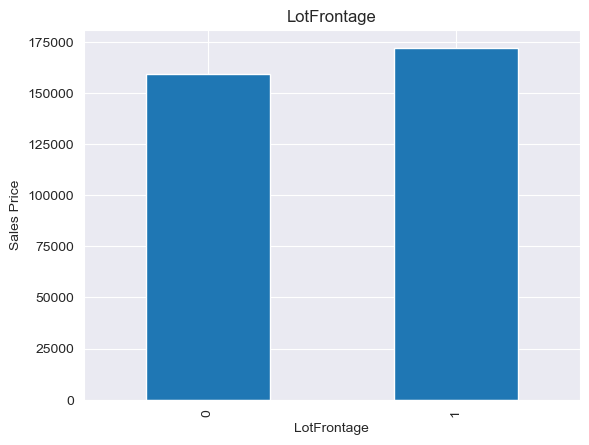

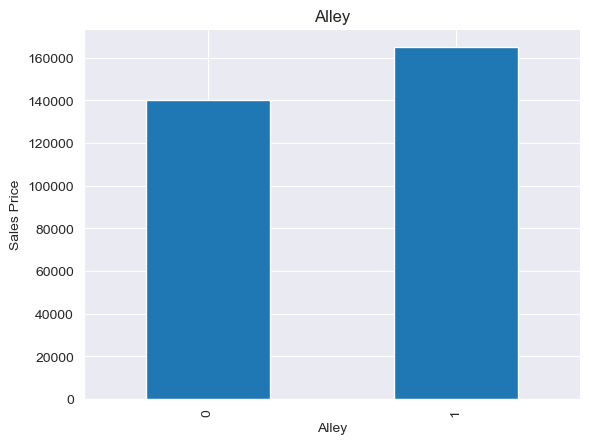

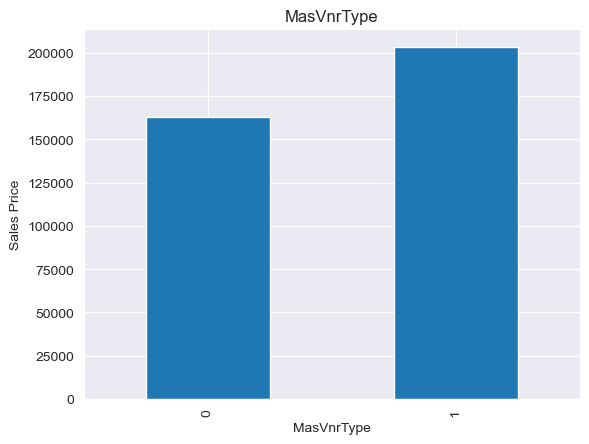

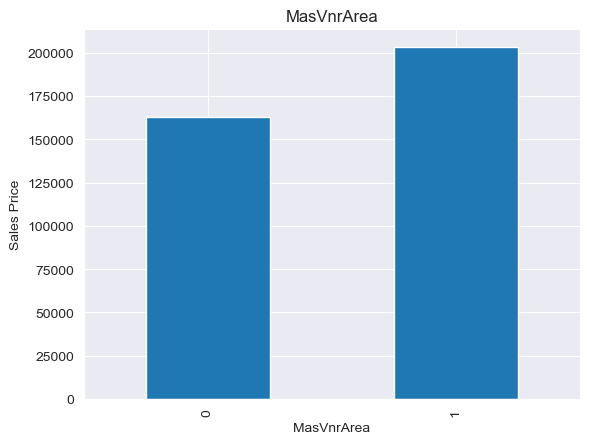

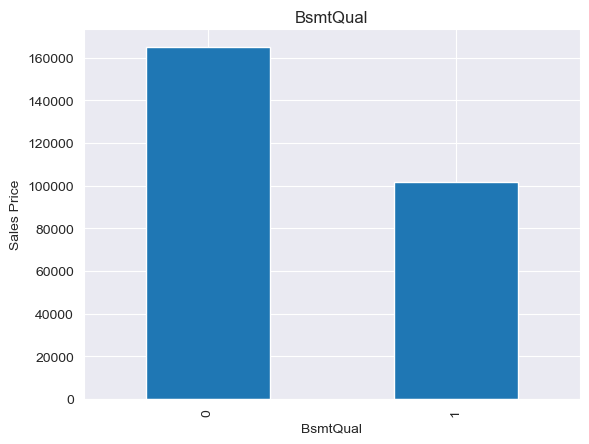

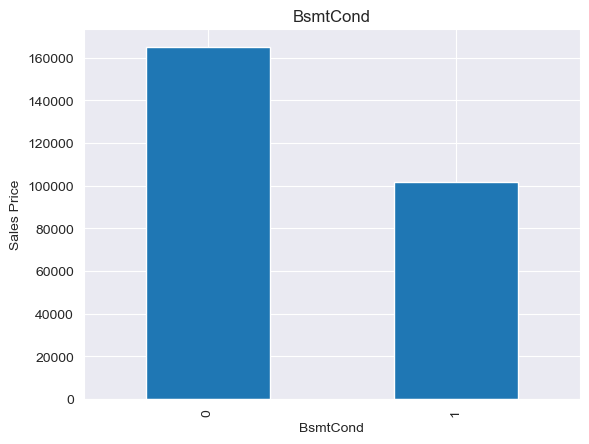

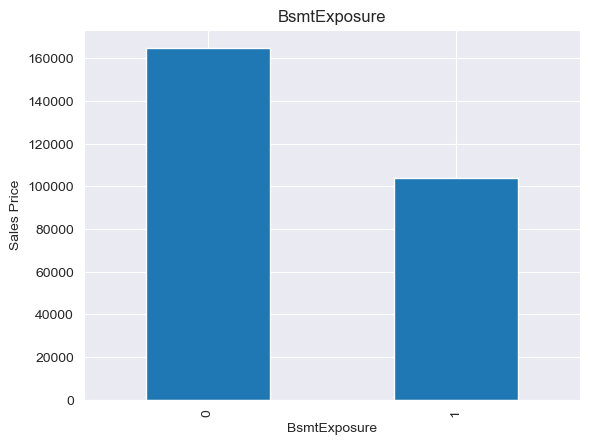

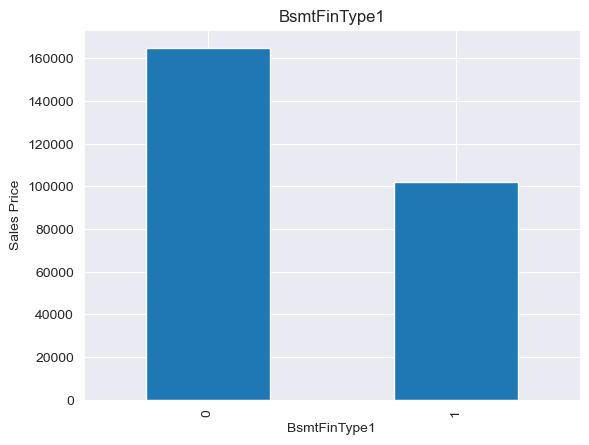

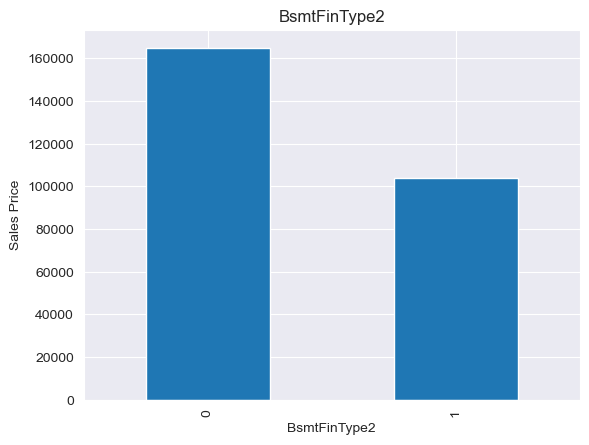

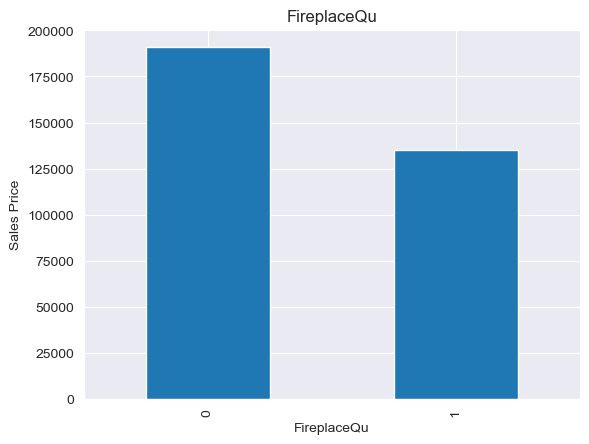

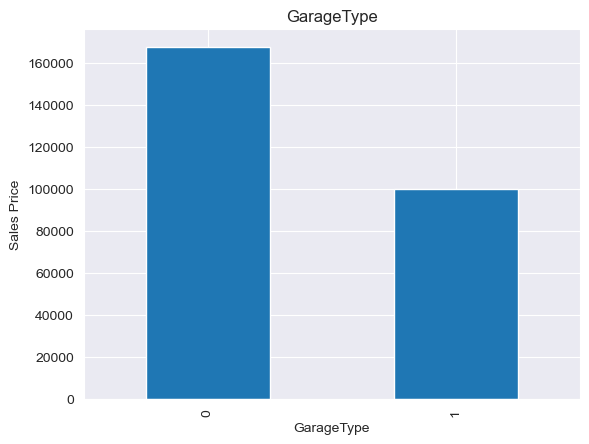

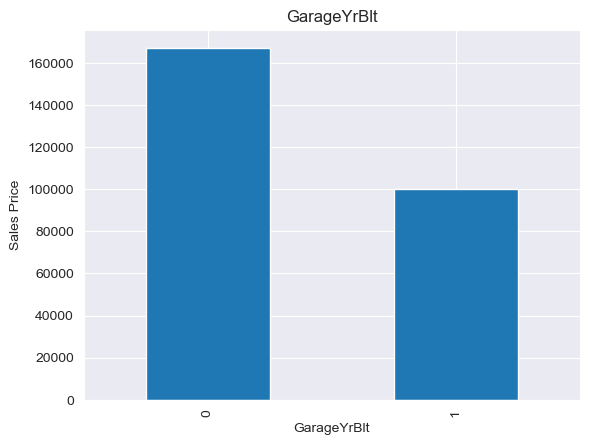

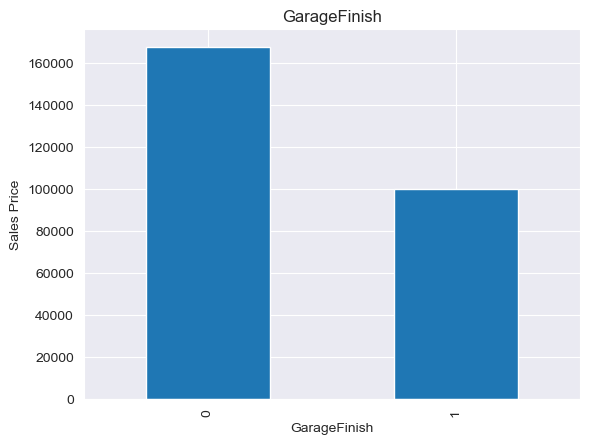

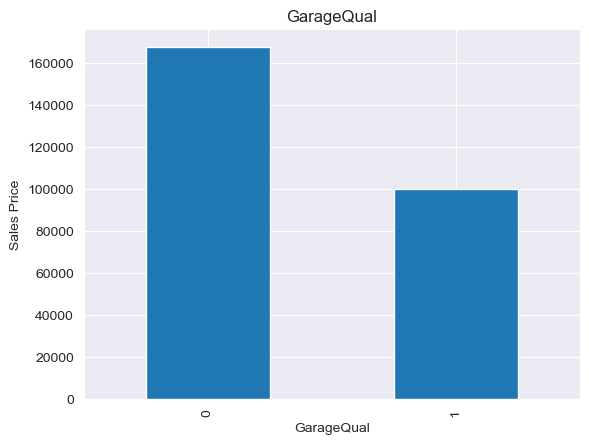

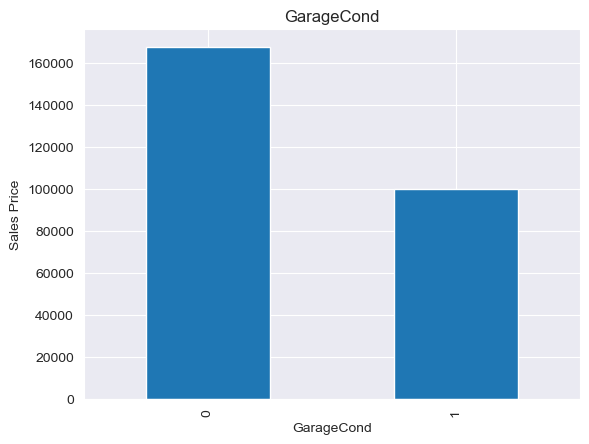

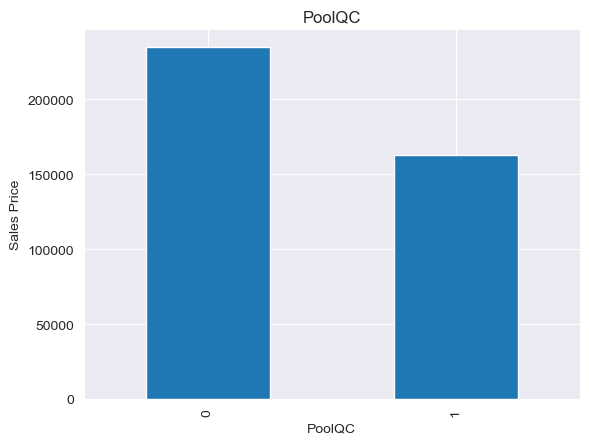

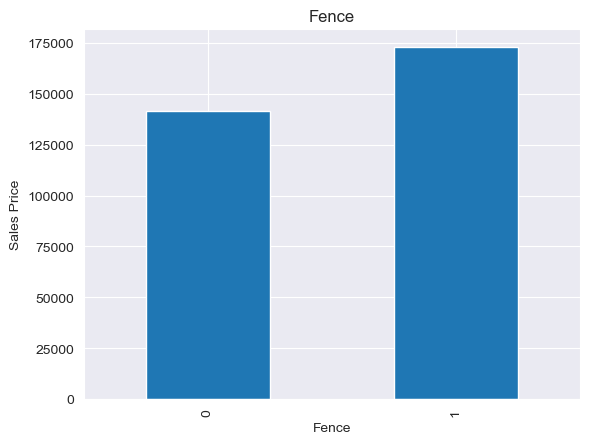

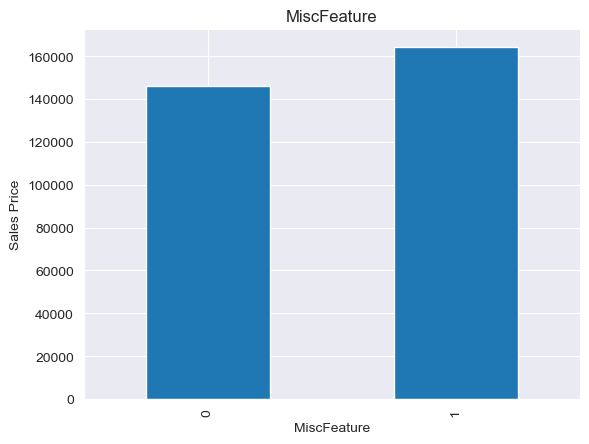

In [8]:
for col in col_with_na:
    data=df.copy()
    ## we are using .copy() because i dont what to make any change in the orginal dataset
    
    ##np.where(condition, x, y)
    ## Here i converting the missing values to 1 and non-missing values to 0 which can be used while viz 
    data[col]=np.where(data[col].isnull(),1,0)
    
    ##groupby will group the particualar column into diffrent group present in it here it is 1(missing) and 0(non-missing) and
    ##I use meadian becaue the SalePrice column may Have outlies it is better to use Median now 
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sales Price')
    plt.show()
    

### Numercial Variable

In [9]:
numerical=[feature for feature in df.columns if df[feature].dtypes != 'O'] ##dtype!='o' where not the object type 
df[numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Temporal Variables

temporal variables refer to variables that represent dates, times, or time intervals.

In [10]:
time=[col for col in df.columns if'Yr' in col or 'Year' in col]
time

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

Text(0.5, 1.0, 'House Price vs YearSold')

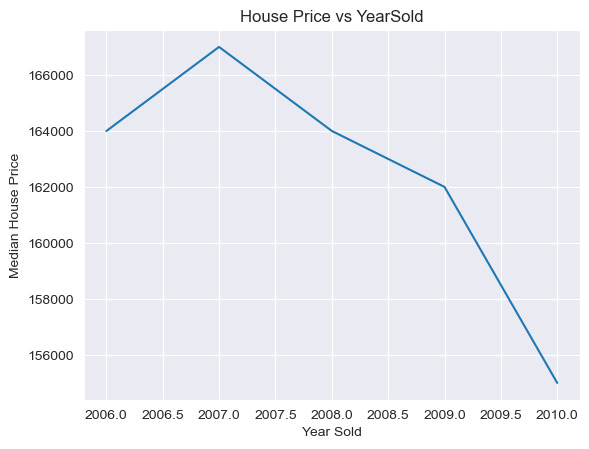

In [12]:
##let analyse the tempral varivale with the sales price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

It's pretty strange ryt as the year increase the house price should also need to increase but it happening opposite we need to find the reason 

In [13]:
time

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

the other year based columns are Year house build,Year modified let the relations for them

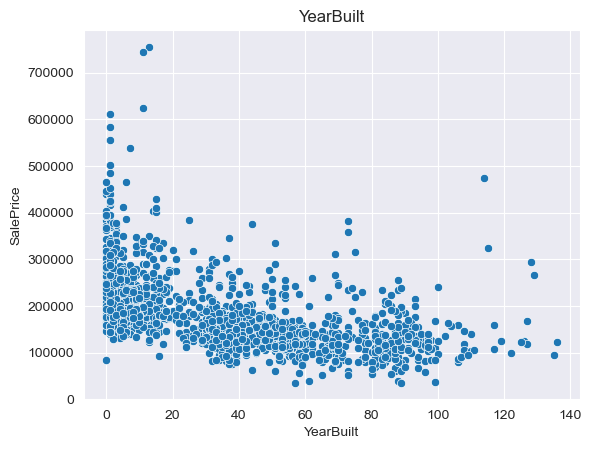

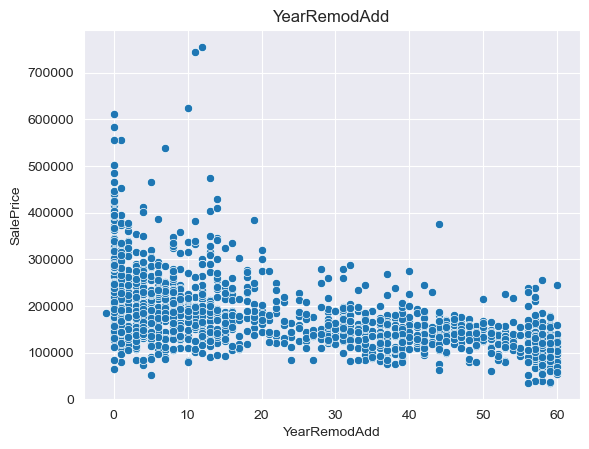

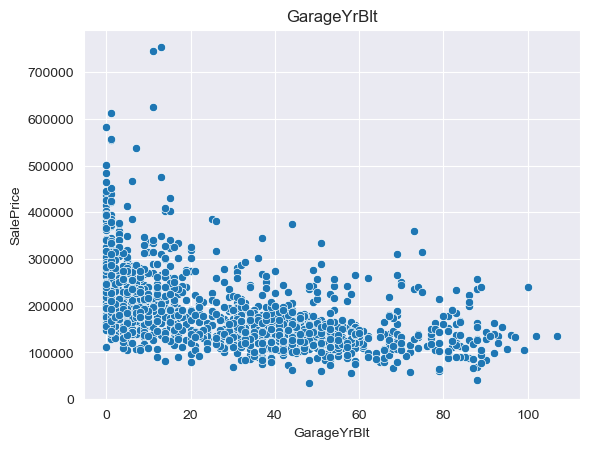

In [14]:
for a in time:
    if a!='YrSold':
        data=df.copy()
        data[a]=data['YrSold']-data[a]
        sns.scatterplot(x=data[a],y=data['SalePrice'])
        plt.title(a)
        plt.show()

### I can clearly see that the Sales Price is high when the house is build or renovation is done recent years

In [15]:
## I need to divide the numberical variables into 2 types 
## 1. Continous variable
## 2.Discrete Variables


In [16]:
discrete=[col for col in numerical if len(df[col].unique())<25 and col not in time]
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [17]:
len(discrete)

17

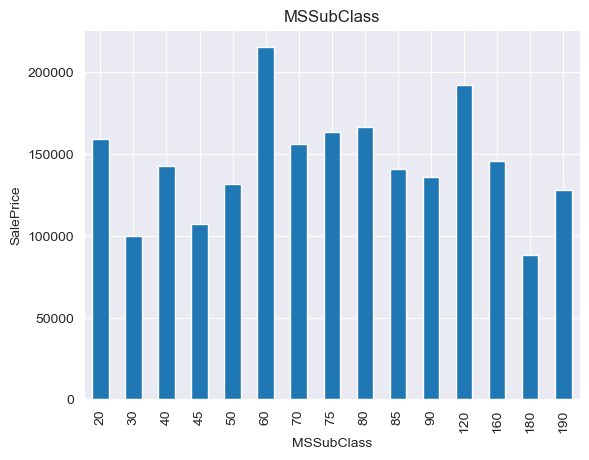

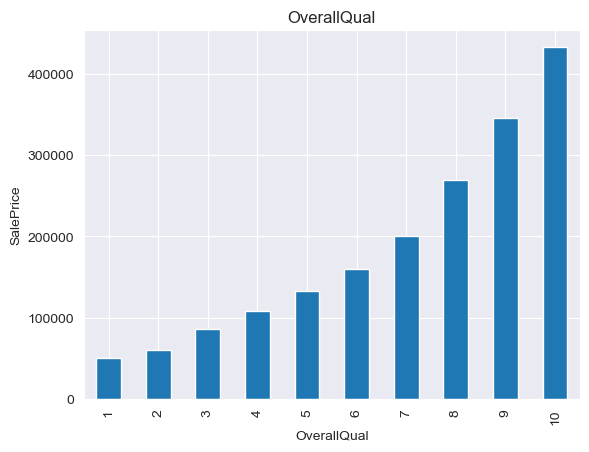

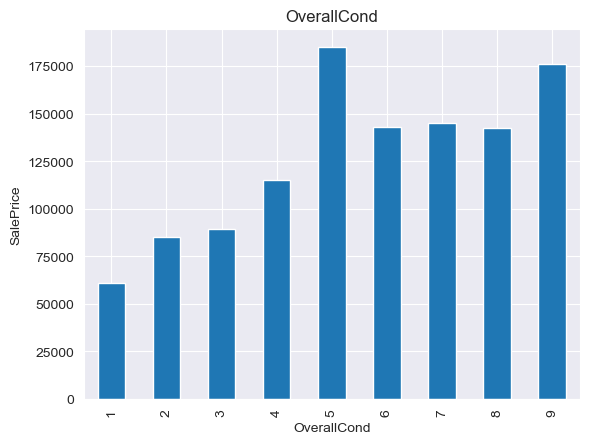

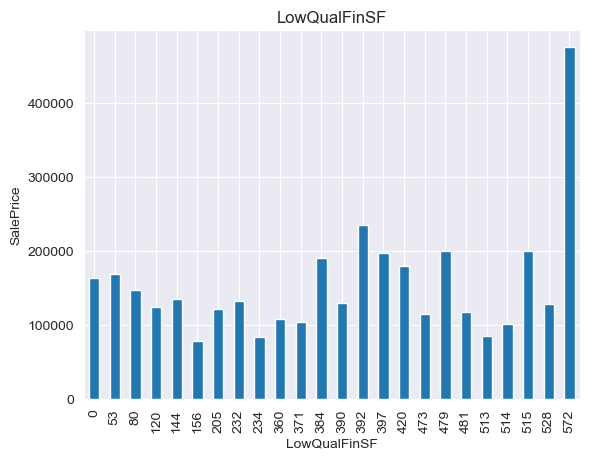

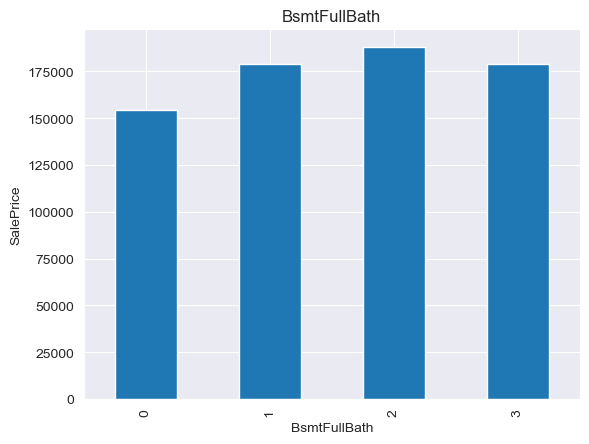

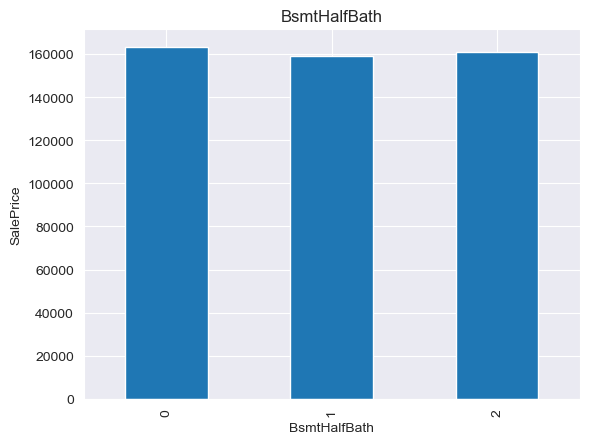

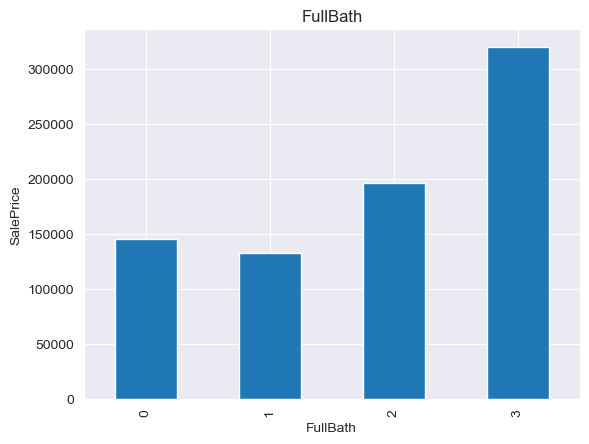

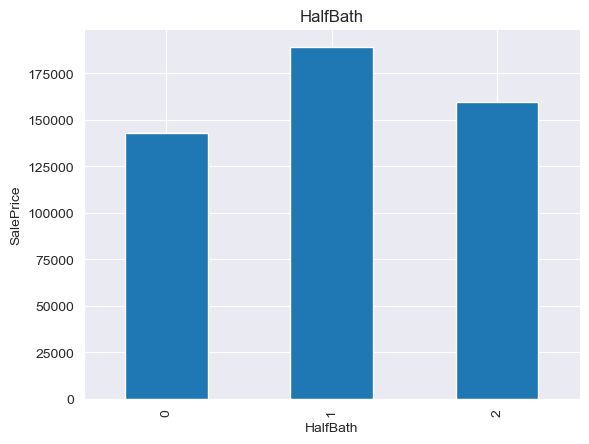

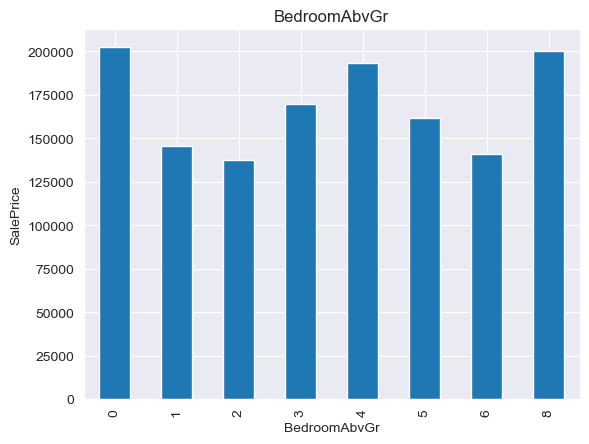

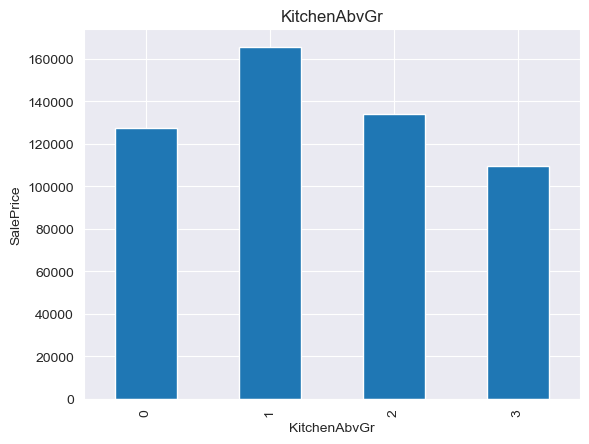

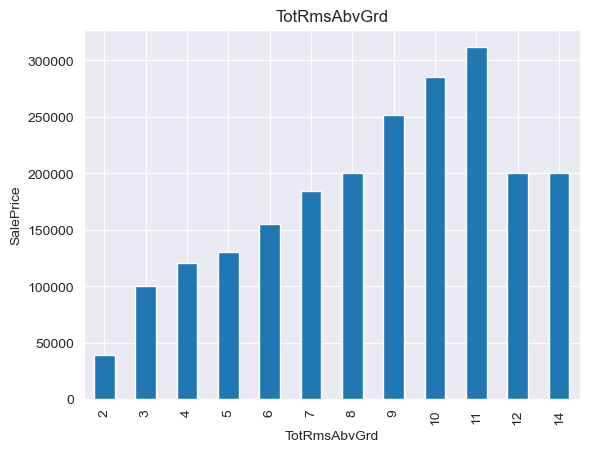

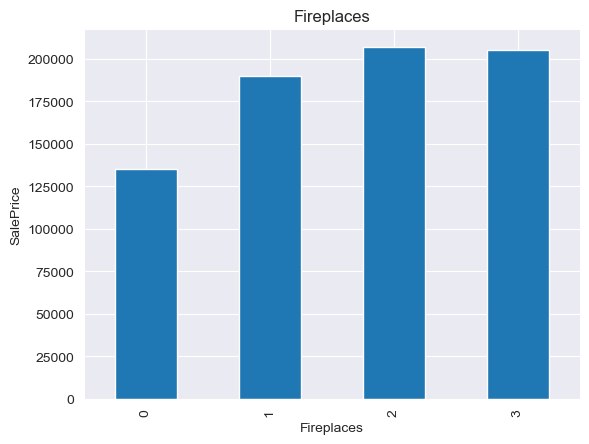

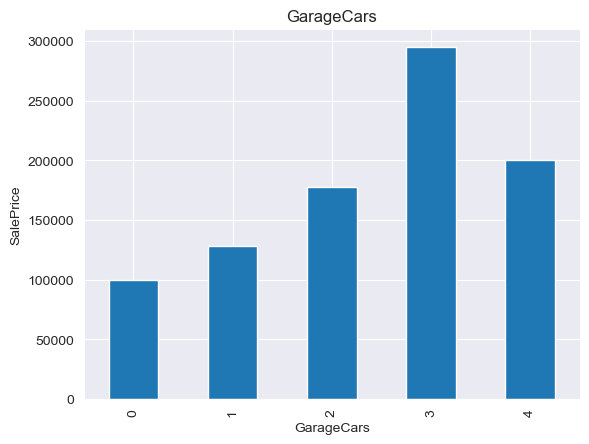

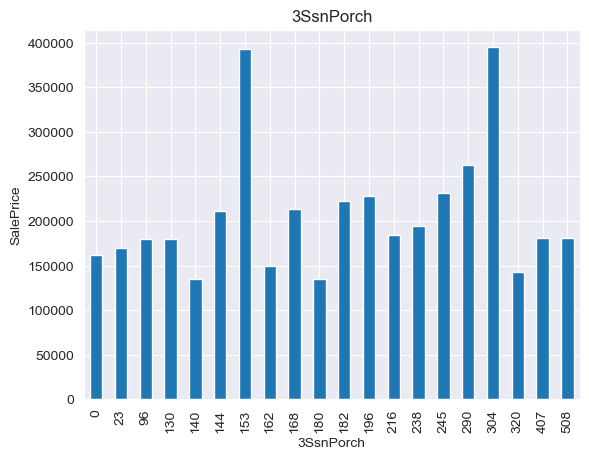

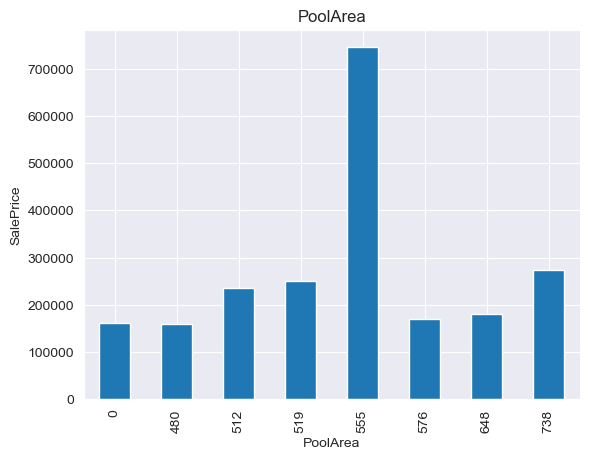

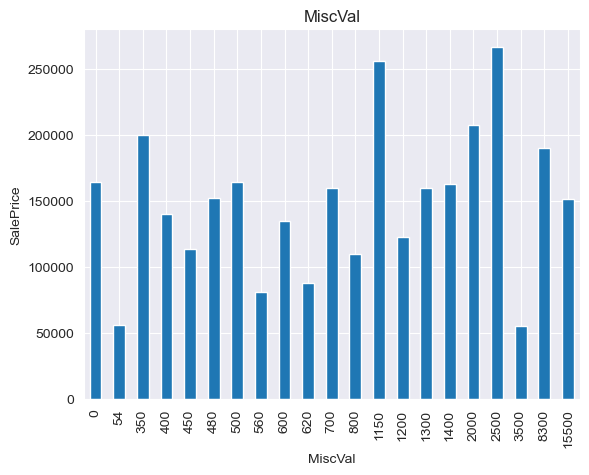

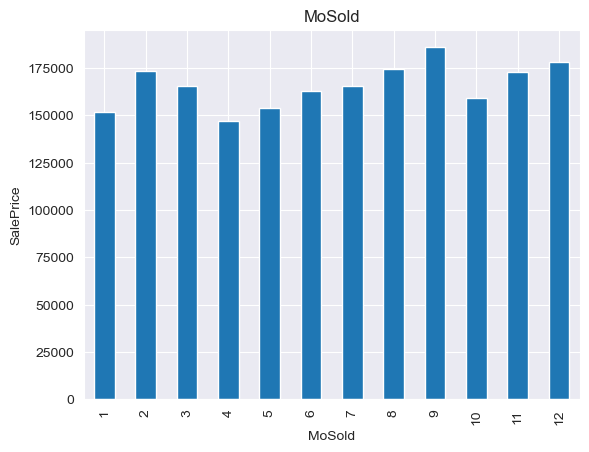

In [18]:
for col in discrete:
    data=df.copy()
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

###  Continous variable 

In [19]:
continous=[col for col in numerical if col not in discrete+time]
len(continous)

17

In [20]:
continous

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [21]:
## Id is not required so i removed it
continous.remove('Id')

In [22]:
len(continous)

16

In [23]:
continous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

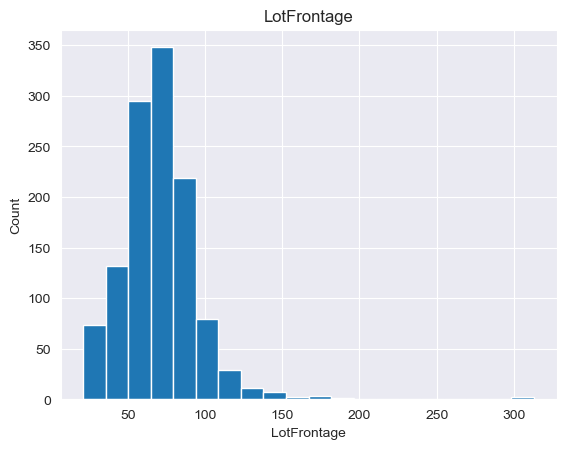

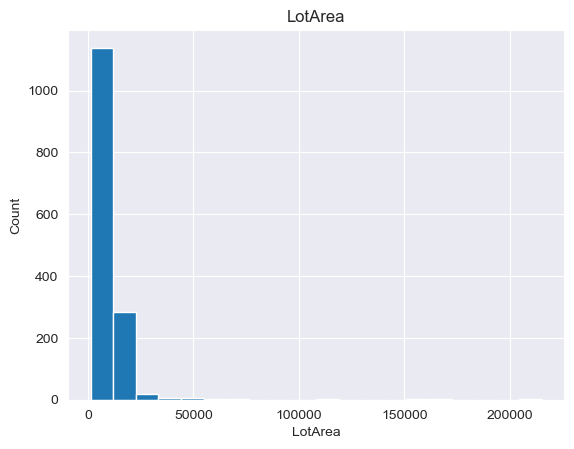

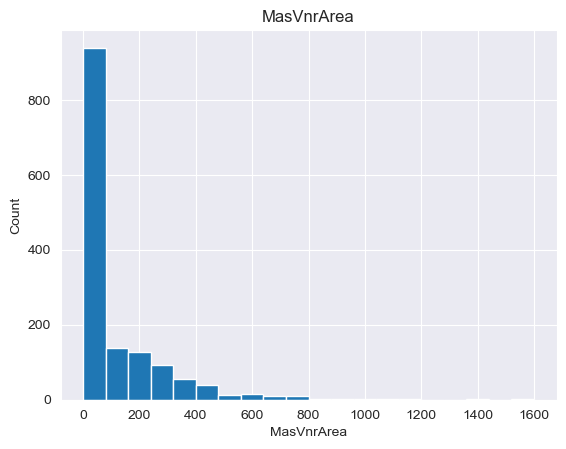

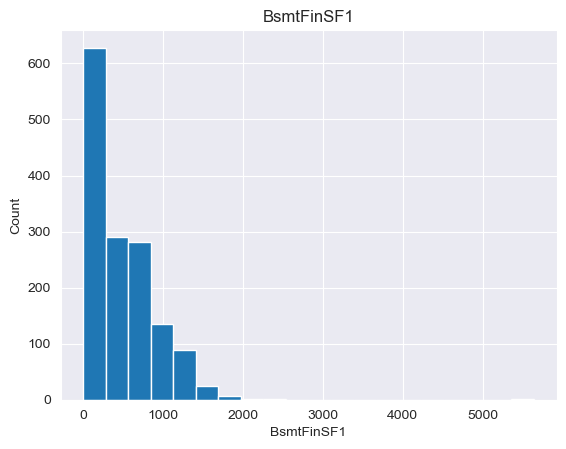

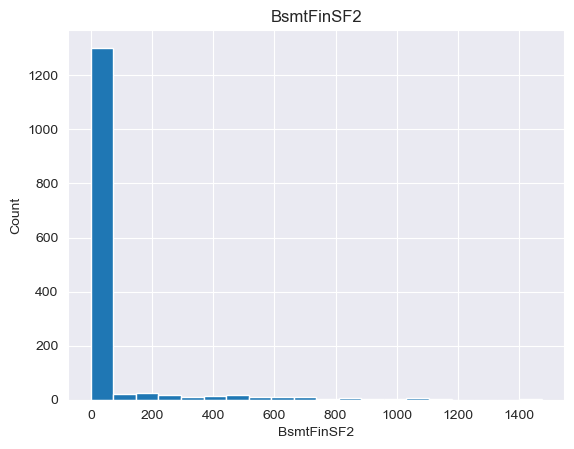

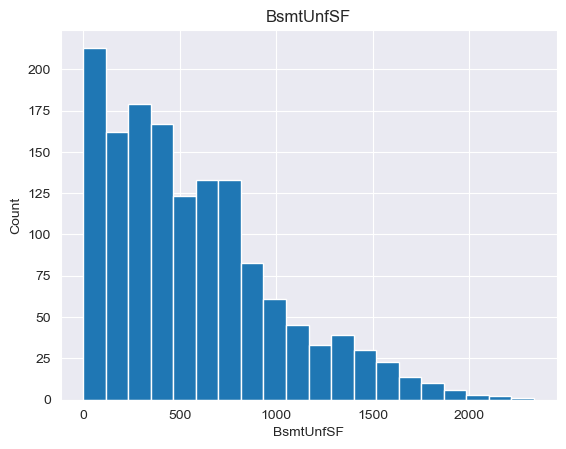

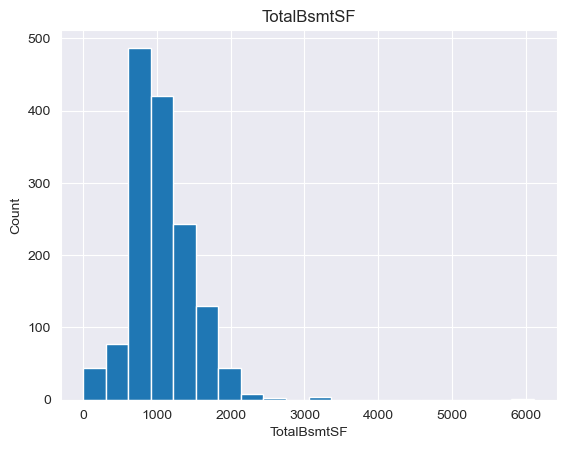

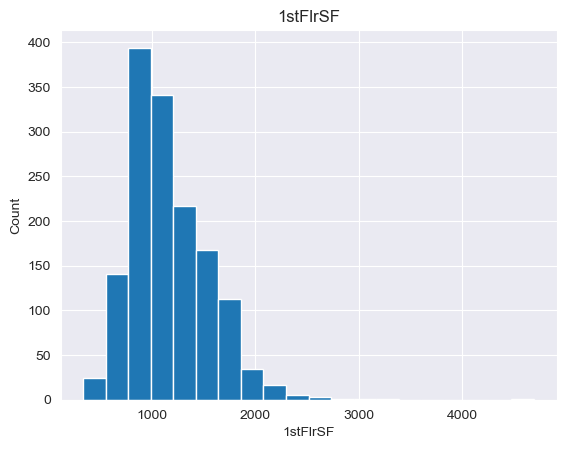

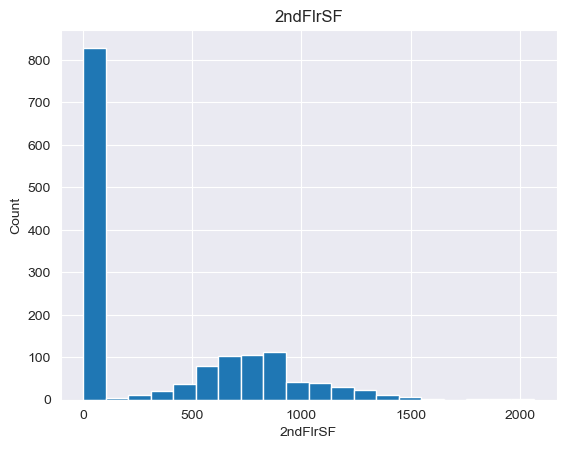

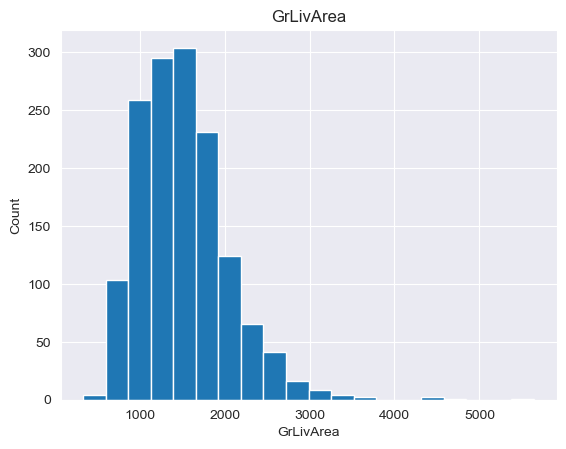

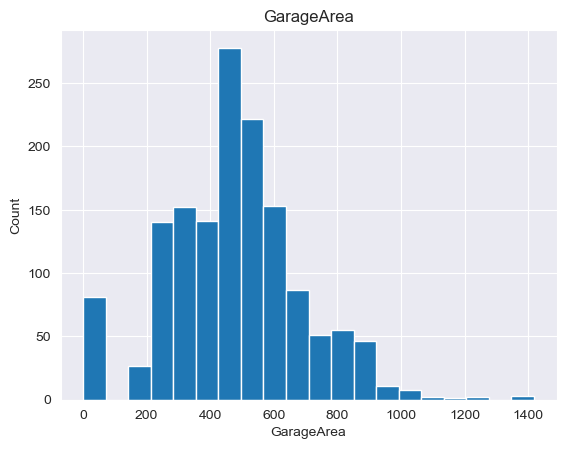

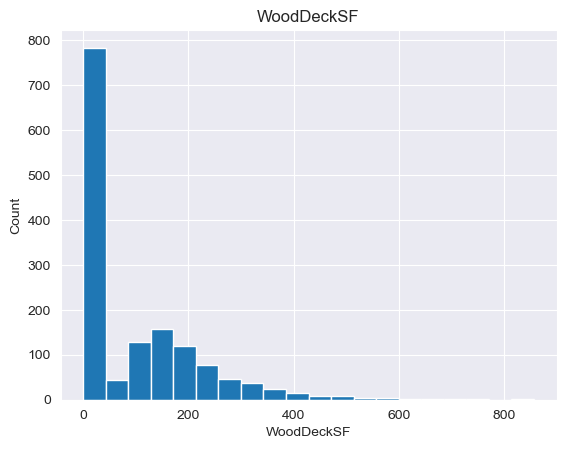

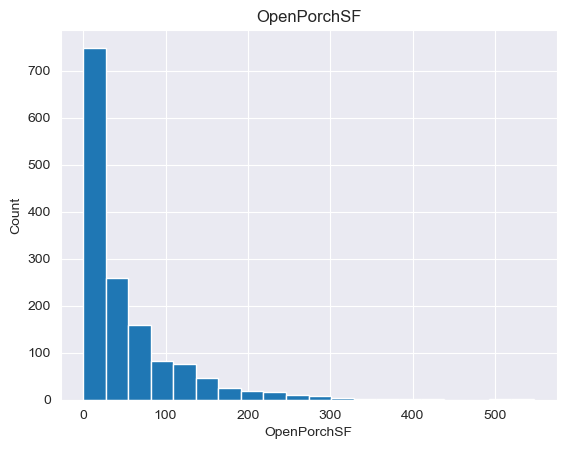

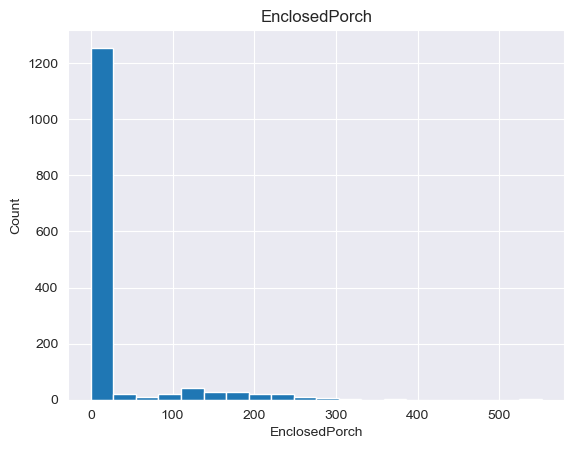

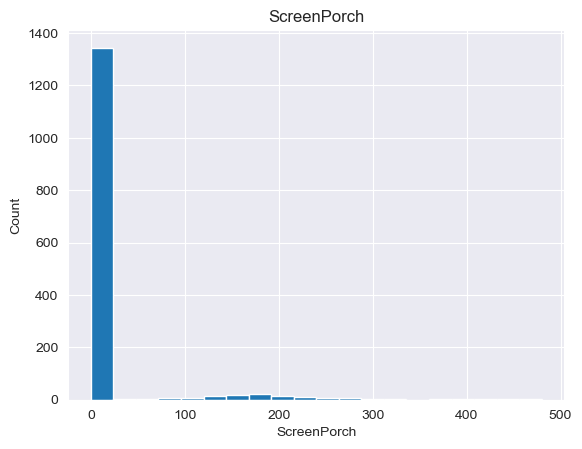

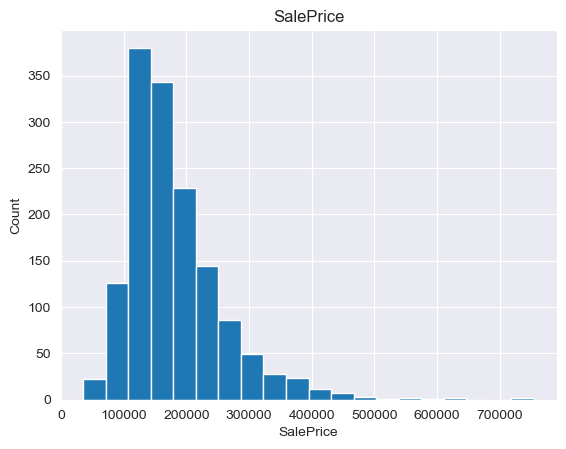

In [24]:
for col in continous:
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

## We can see that most of the Data is Skewed to left 

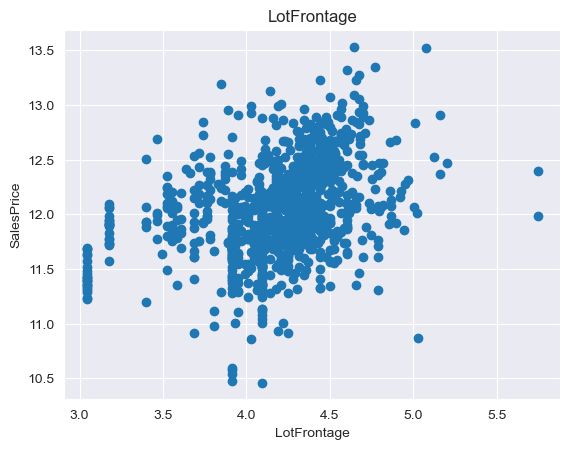

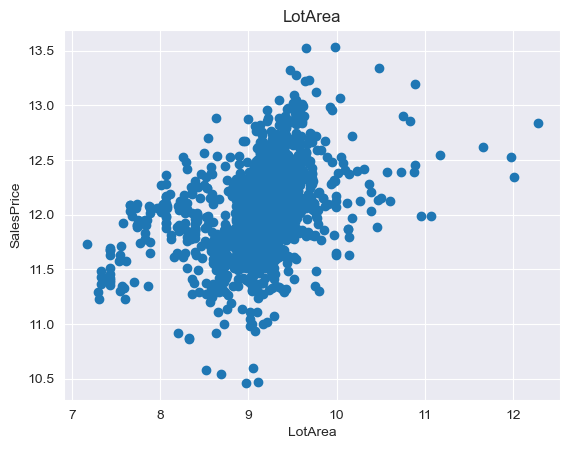

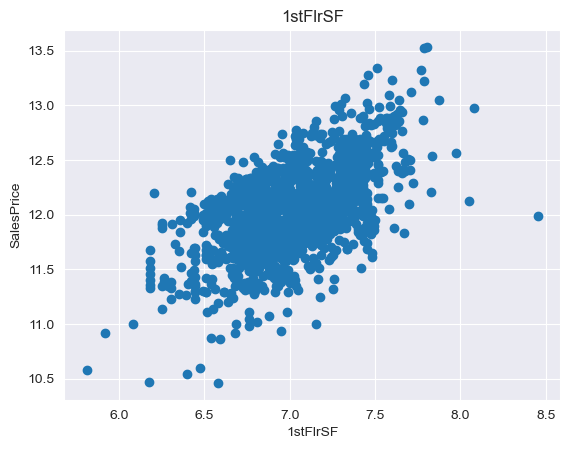

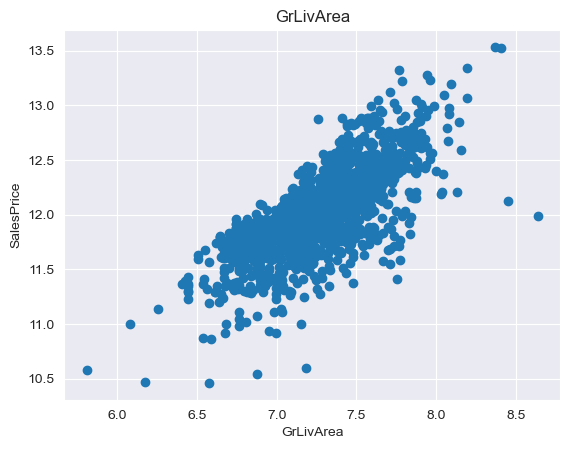

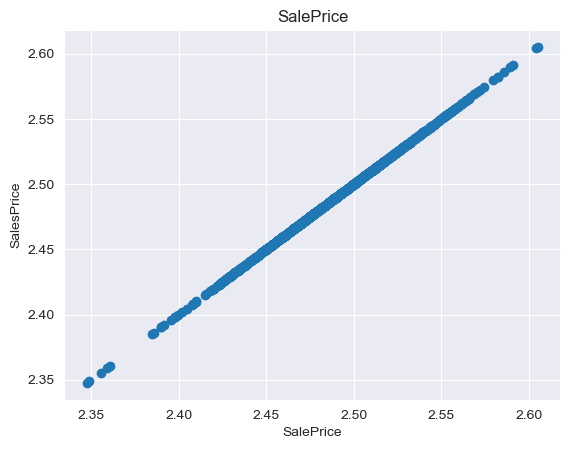

In [25]:
## O will be using logarithmic transformation to Skewed data

for col in continous:
    data=df.copy()
    ##is used in logarithmic transformation to handle zero values in the data before applying the transformation
    ##because the logarithm of zero or negative values is undefined
    if 0 in data[col].unique():
        pass
    else:
        data[col]=np.log(data[col])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[col],data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalesPrice')
        plt.title(col)
        plt.show()
        


## Outliers

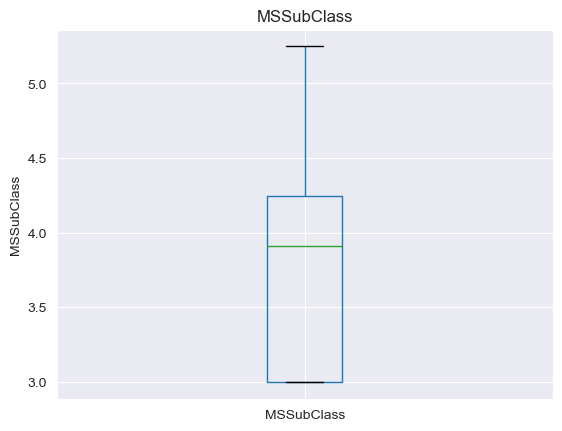

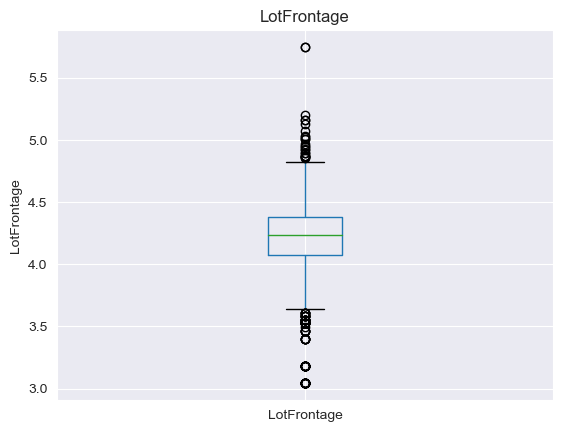

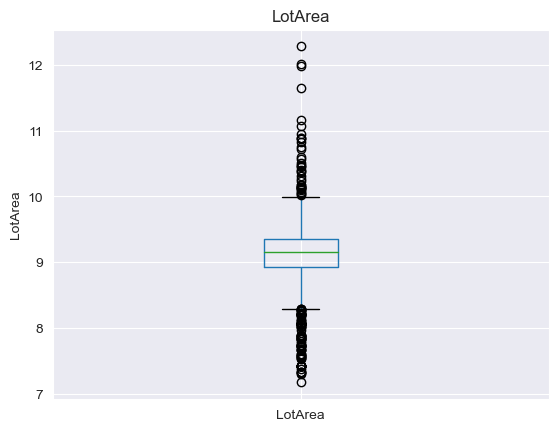

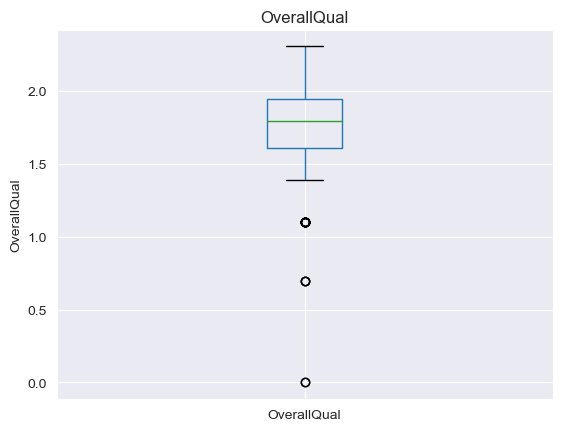

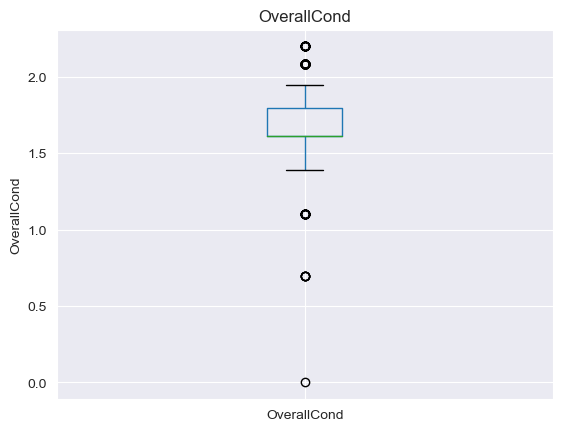

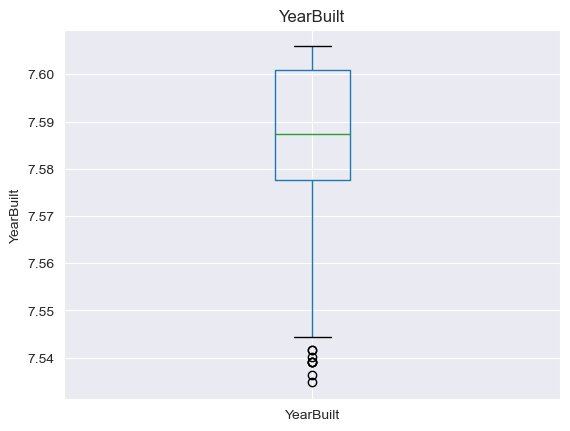

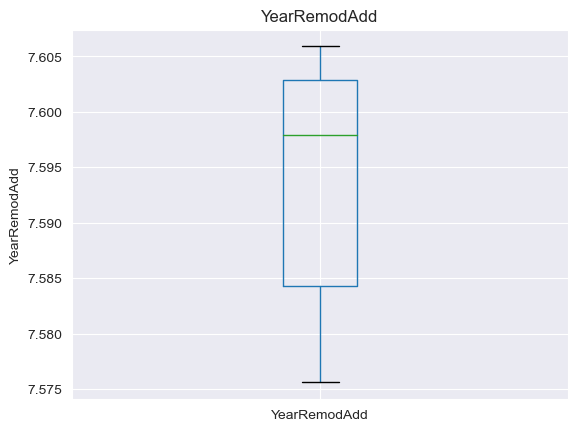

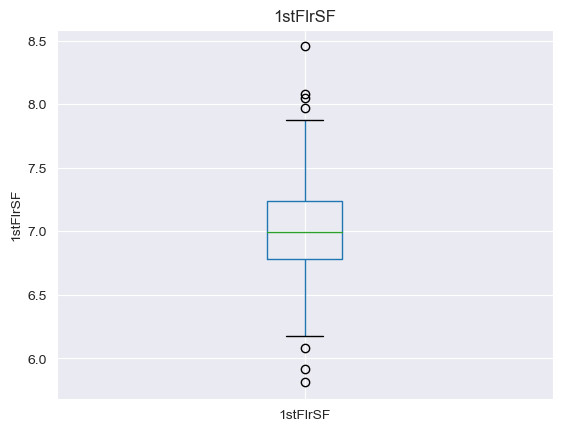

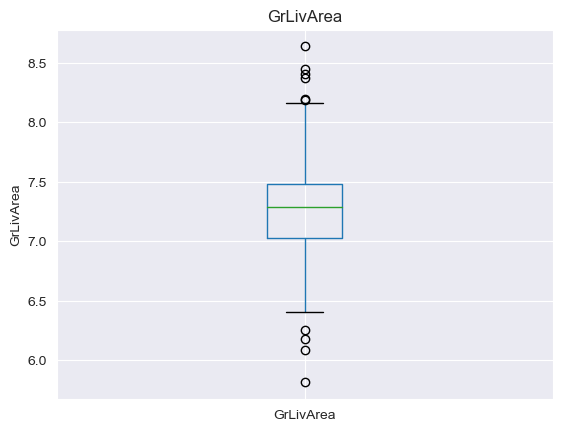

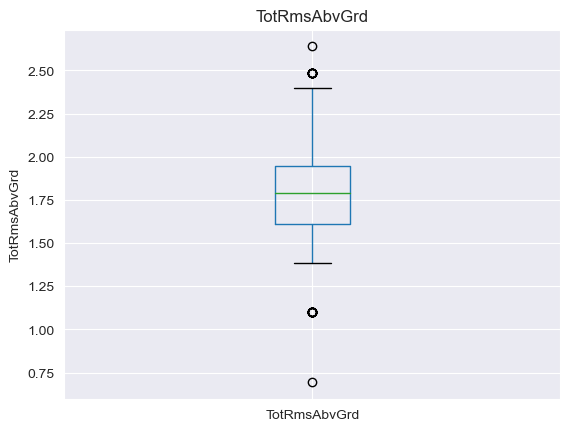

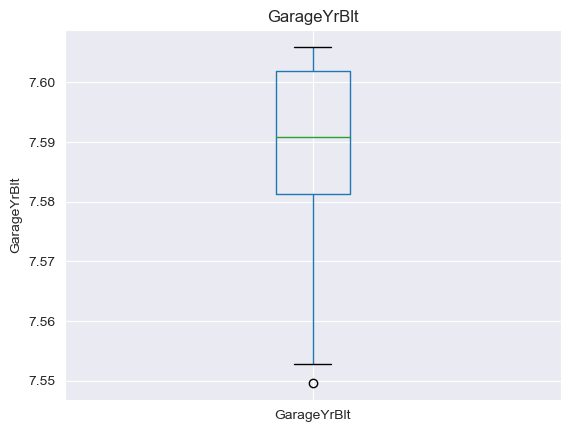

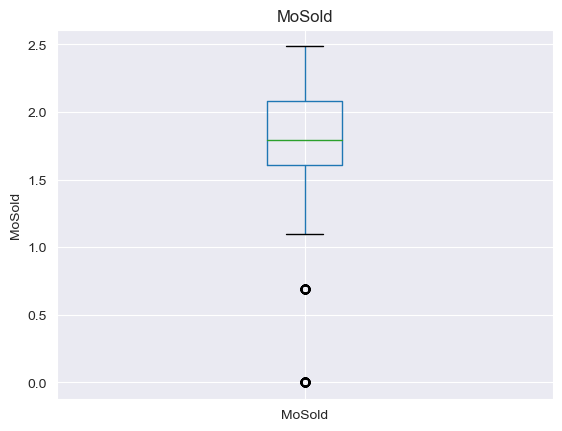

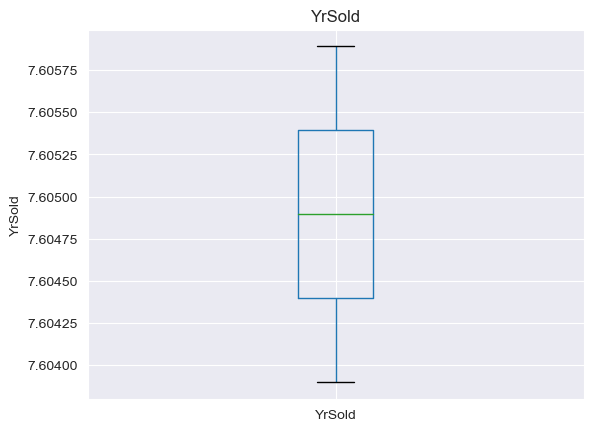

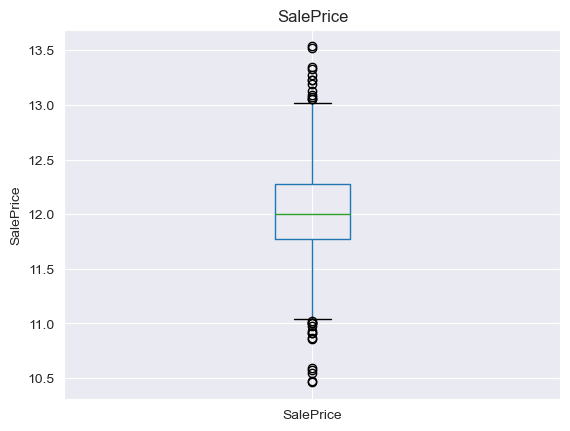

In [26]:
for col in numerical:
    if col!='Id':
        data=df.copy()
        if 0 in data[col].unique():
          pass
        else:
          data[col]=np.log(data[col])
          data.boxplot(column=col)
          plt.ylabel(col)
          plt.title(col)
          plt.show()
        

## Categorical Variables

In [27]:
categorical=[col for col in df.columns if df[col].dtypes=='O']
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
len(categorical)

43

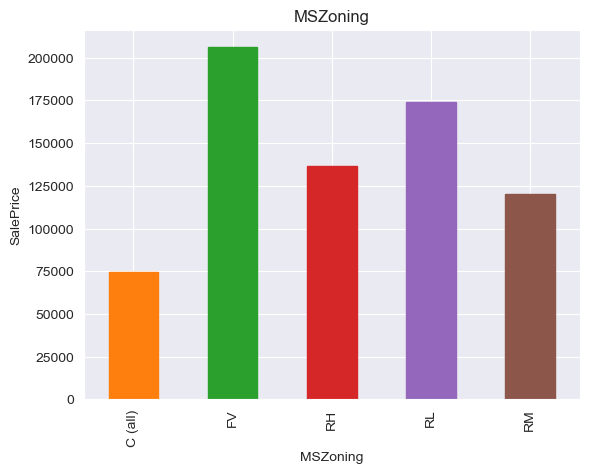

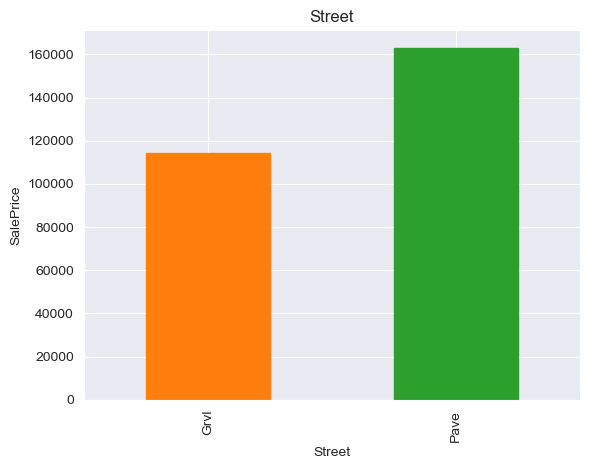

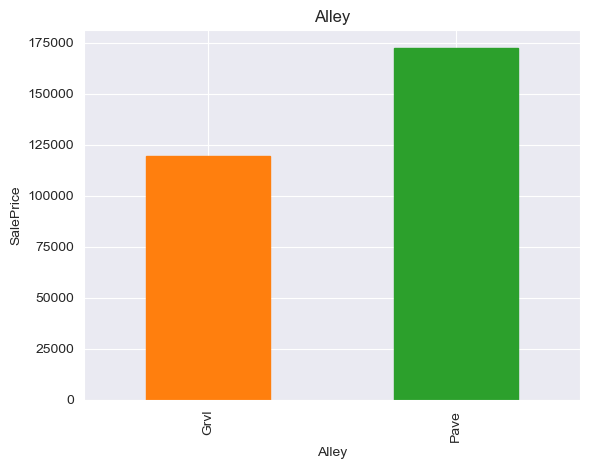

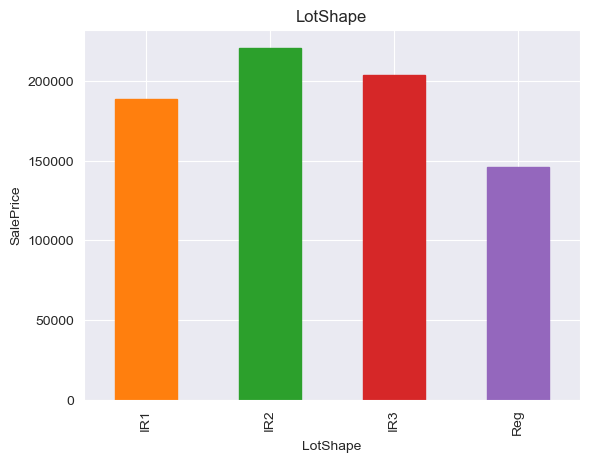

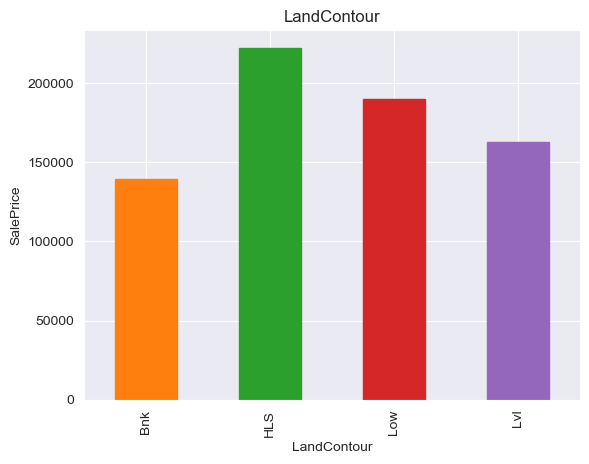

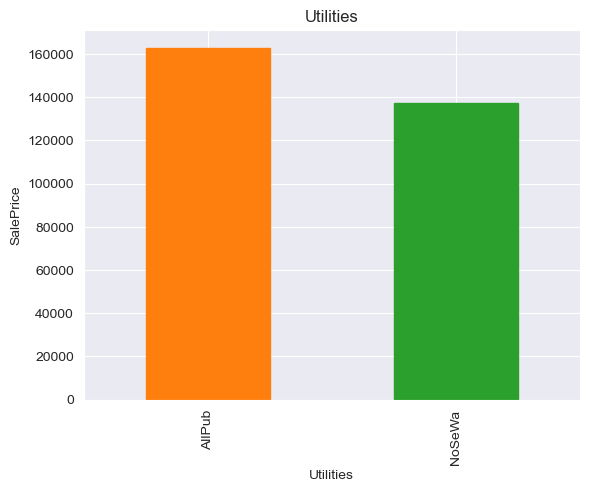

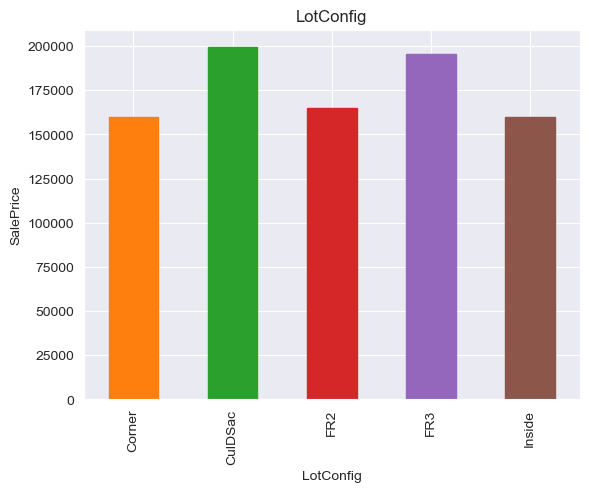

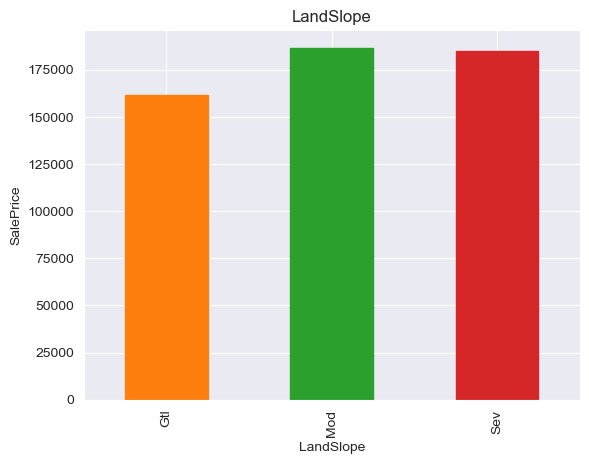

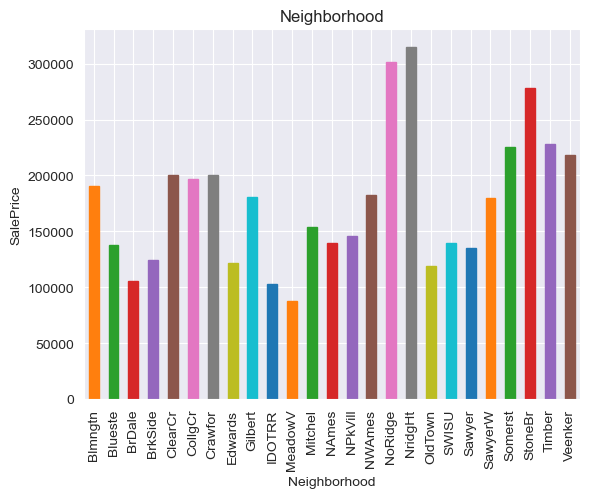

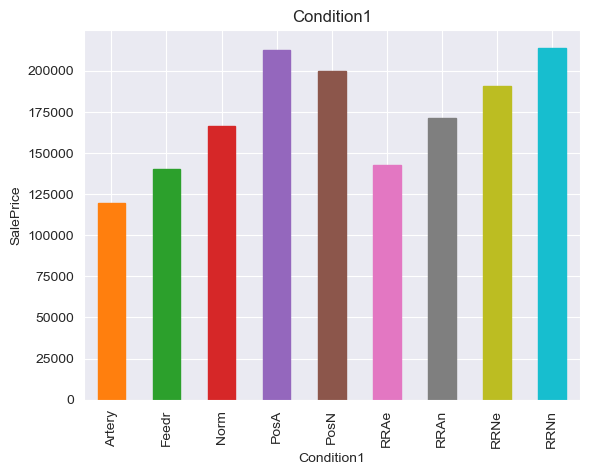

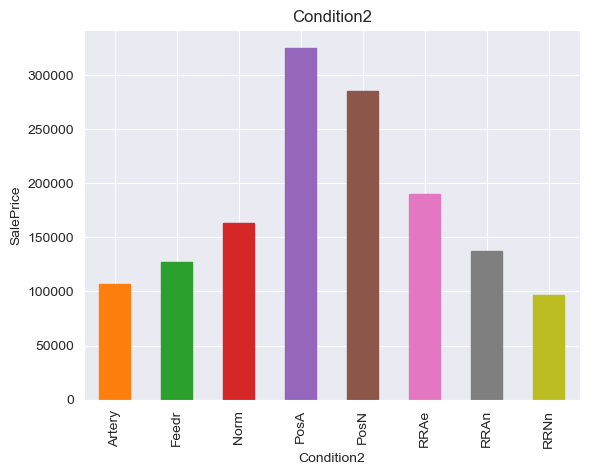

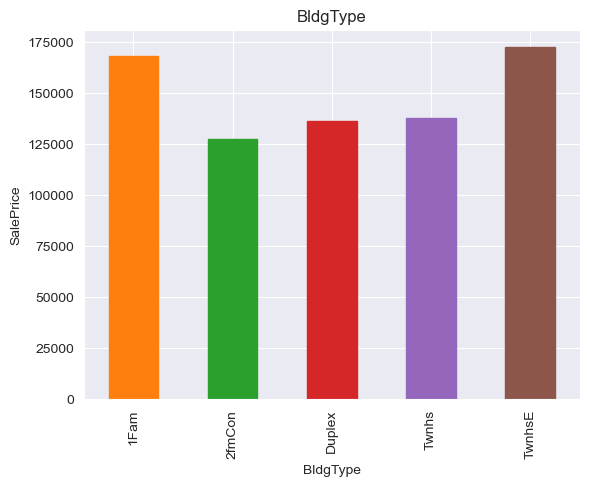

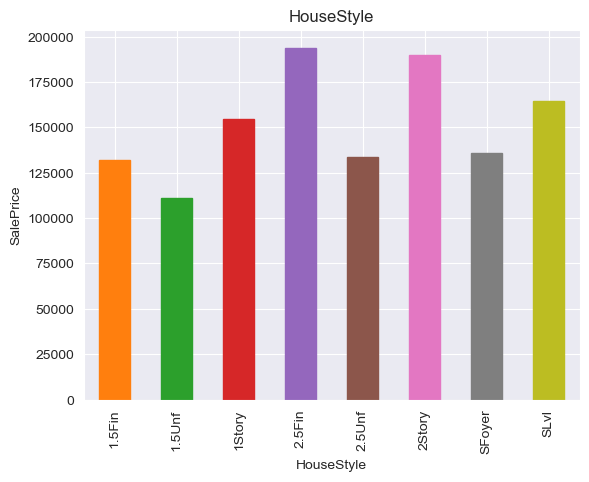

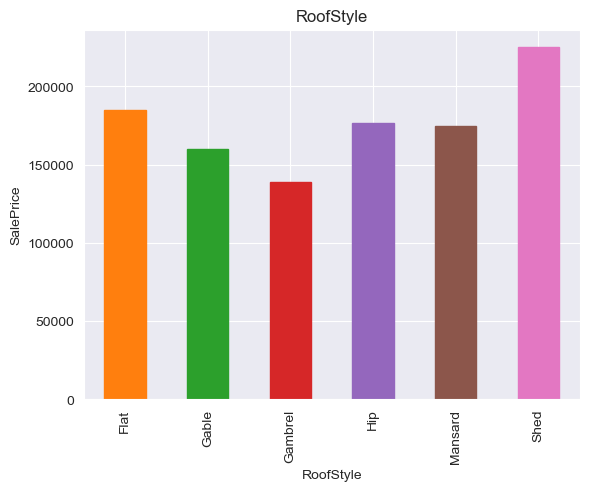

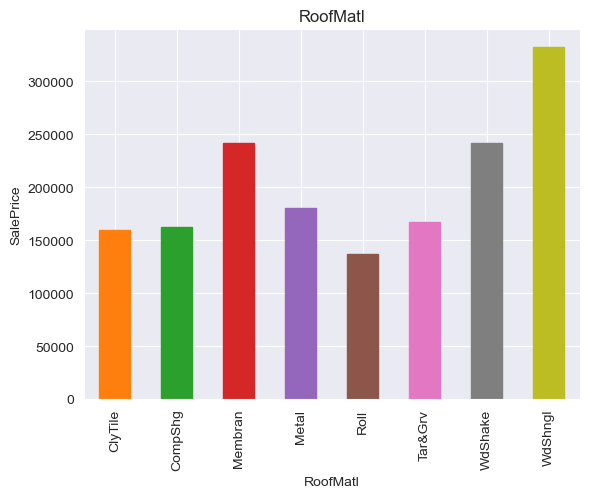

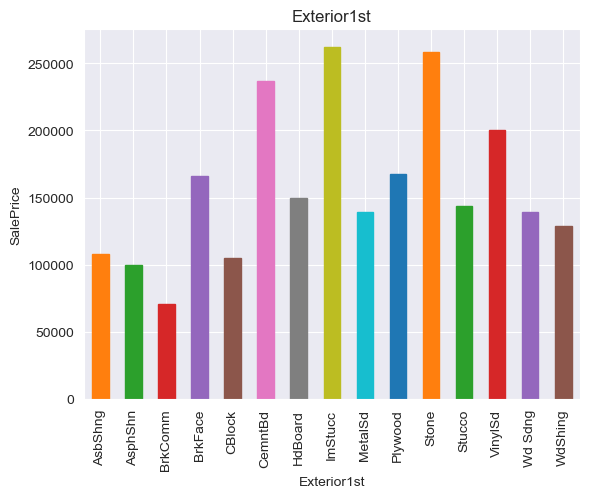

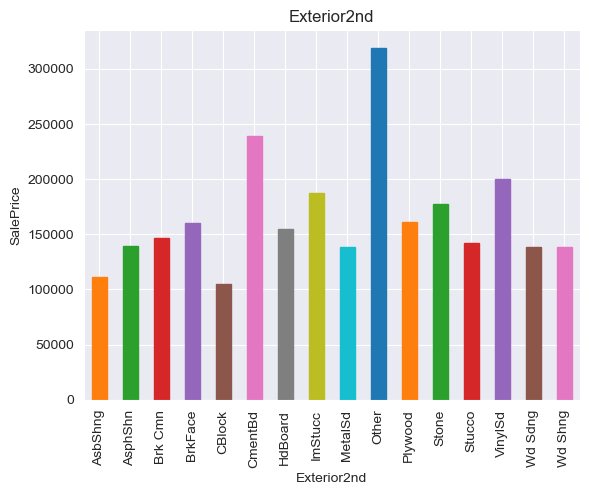

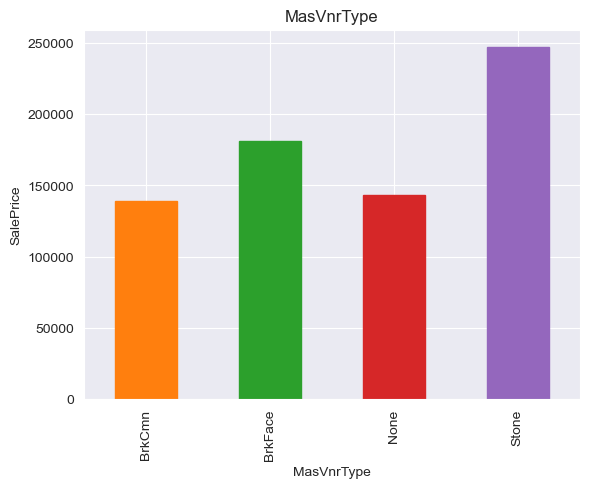

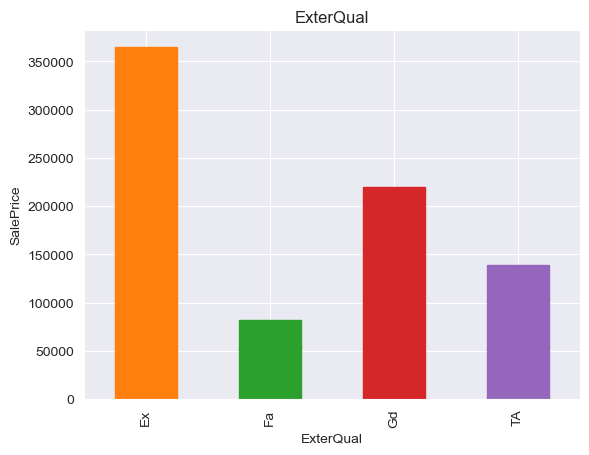

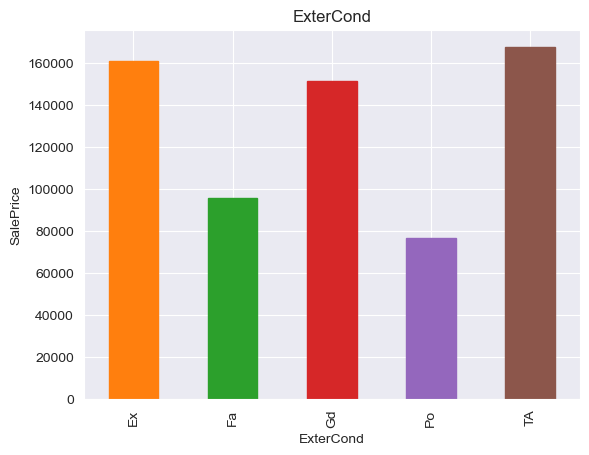

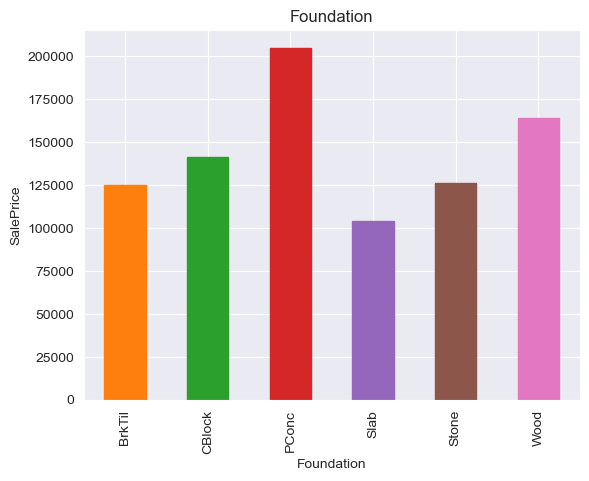

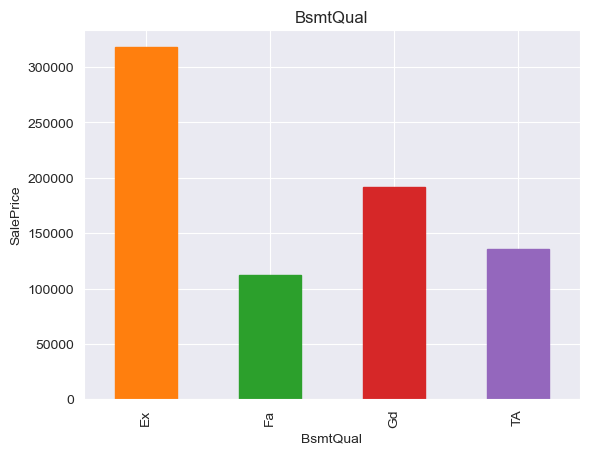

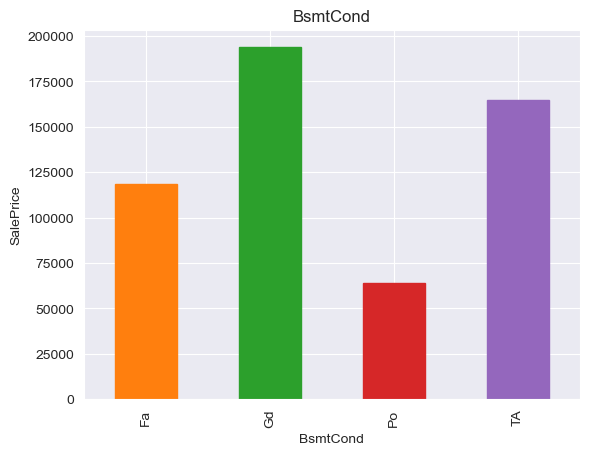

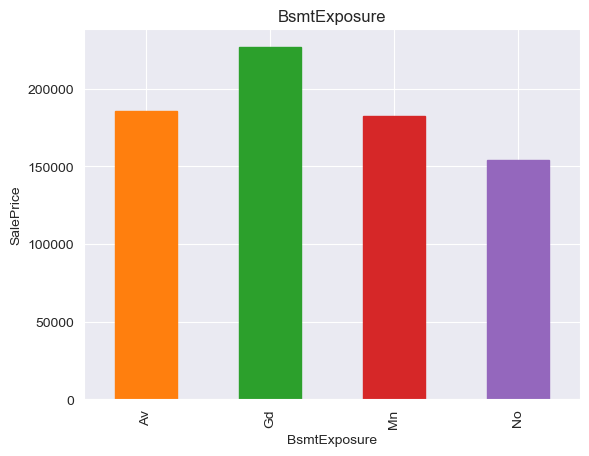

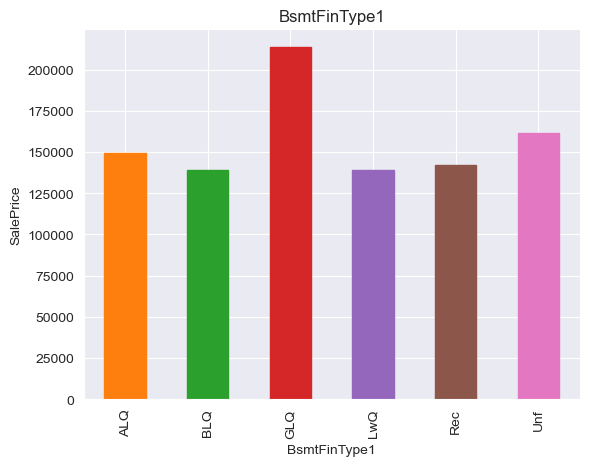

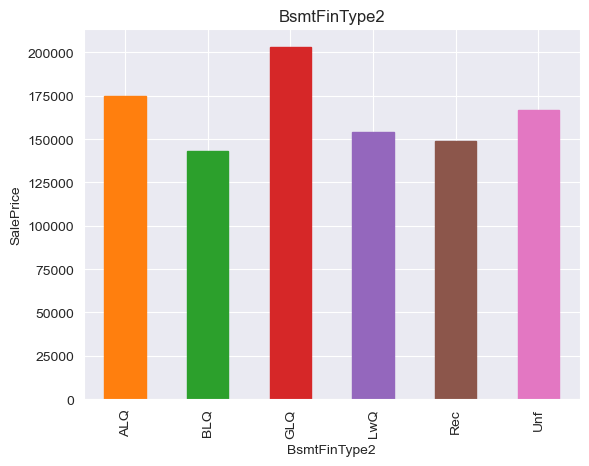

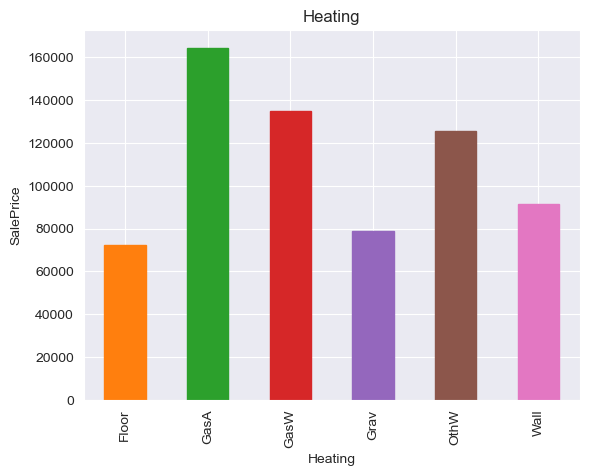

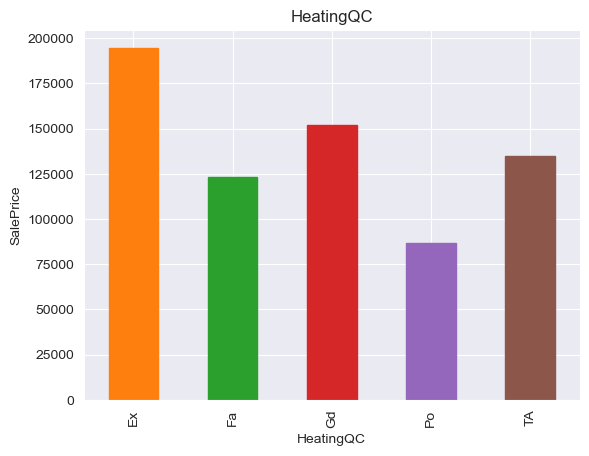

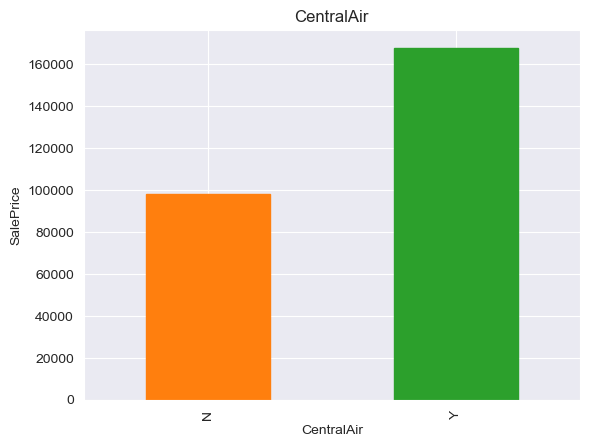

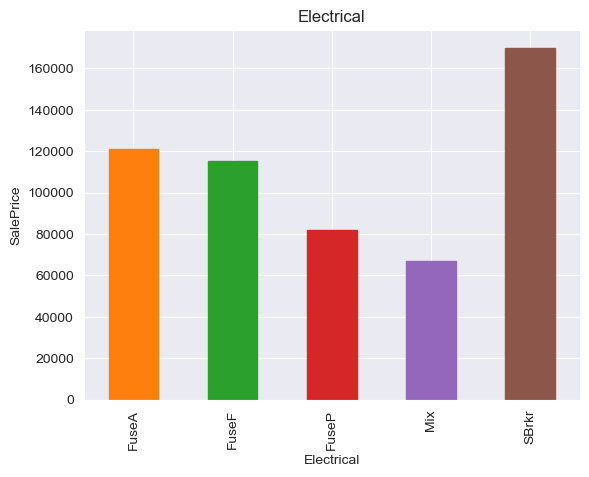

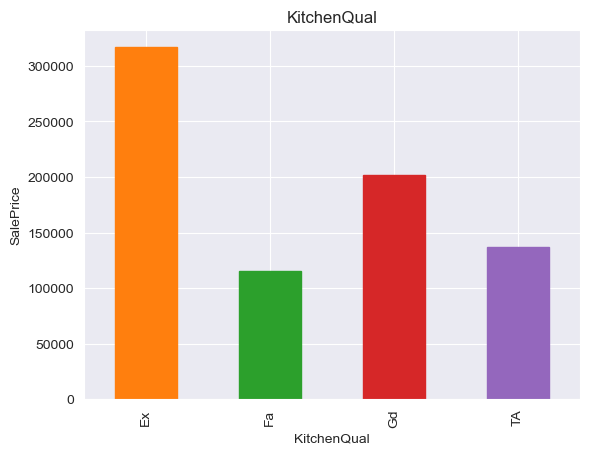

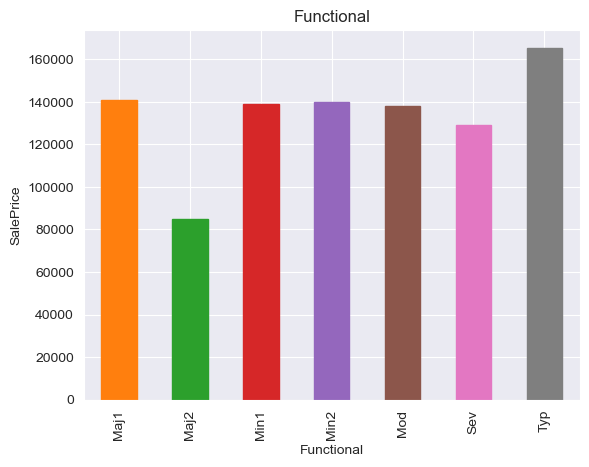

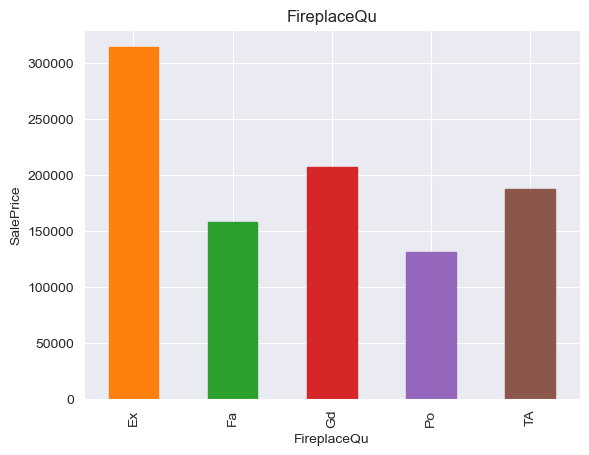

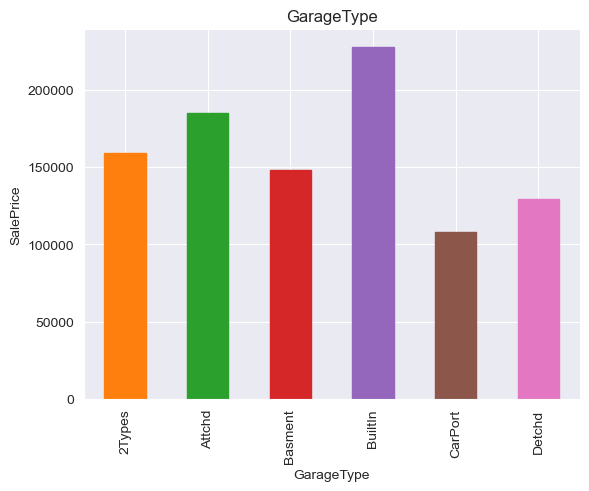

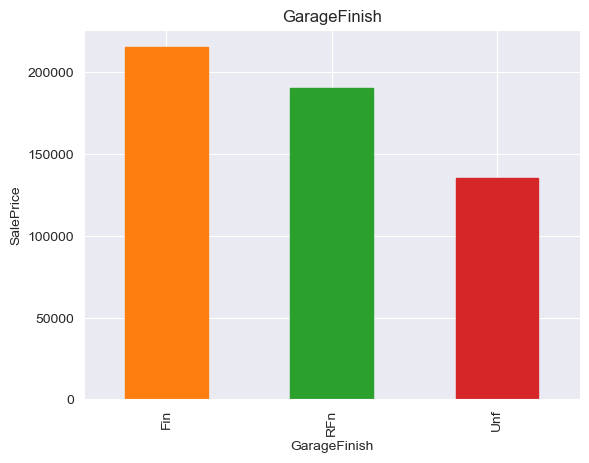

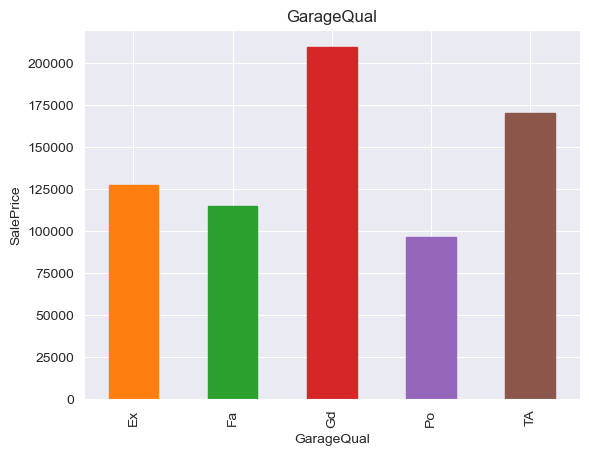

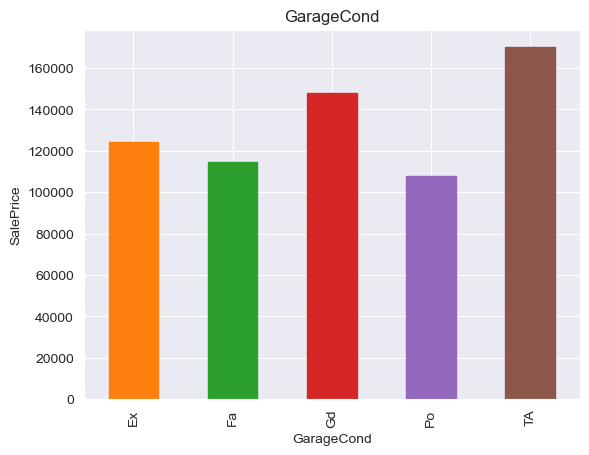

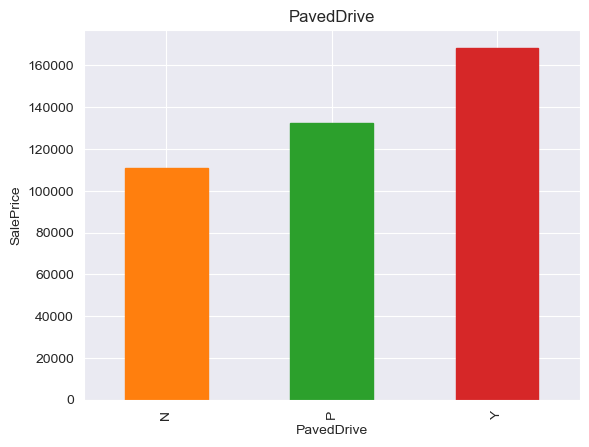

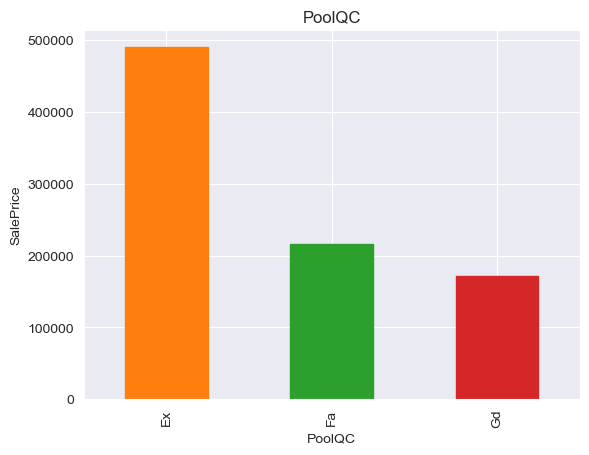

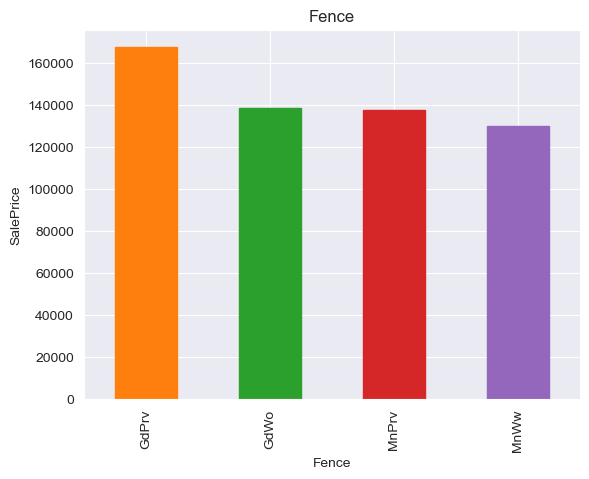

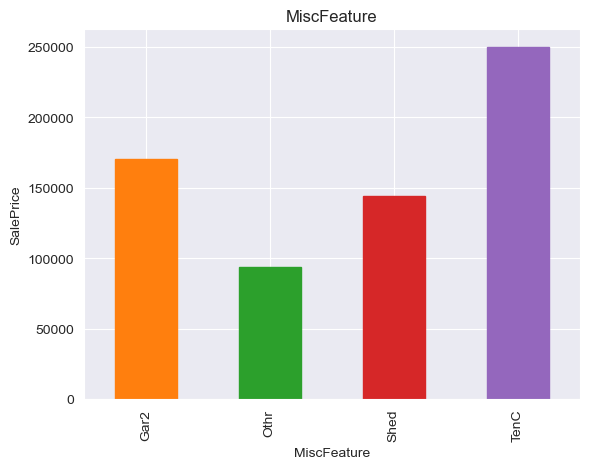

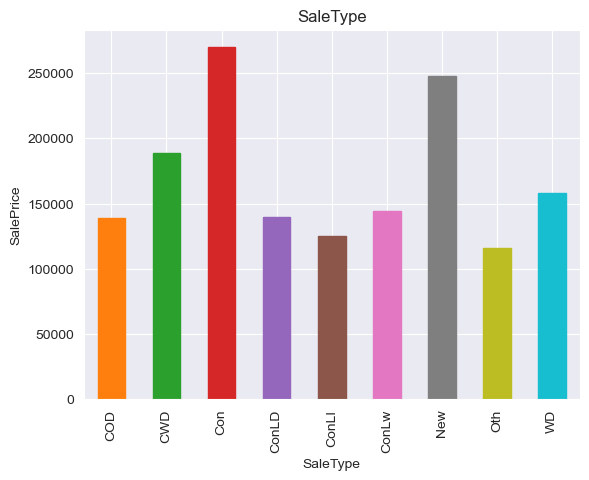

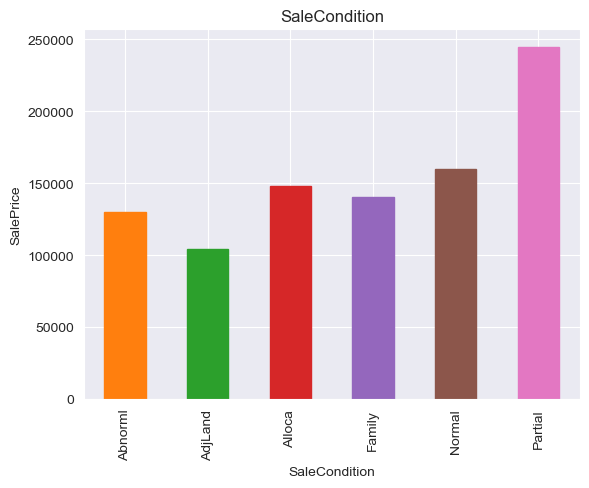

In [29]:
for col in categorical:
    data=df.copy()
    ax=data.groupby(col)['SalePrice'].median().plot.bar()
    
    # Customize the color of each bar individually
    for i, bar in enumerate(ax.patches):
    # Change the color of the bar based on the index (i)
        bar.set_color(f'C{i+1}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

# Feature Engineering

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.2,random_state=1)


In [31]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((1168, 81), (292, 81), (1168,), (292,))

## Handling Missing Values

In [32]:
## First we can Handle missing values for Categorical Variables
cat_nan=[]
for col in categorical:
     if df[col].isnull().sum() >=1:
        a=df[col].isnull().sum()
        cat_nan.append(col)
        print("{}={} % missing value".format(col,a/1460))

Alley=0.9376712328767123 % missing value
MasVnrType=0.005479452054794521 % missing value
BsmtQual=0.025342465753424658 % missing value
BsmtCond=0.025342465753424658 % missing value
BsmtExposure=0.026027397260273973 % missing value
BsmtFinType1=0.025342465753424658 % missing value
BsmtFinType2=0.026027397260273973 % missing value
Electrical=0.0006849315068493151 % missing value
FireplaceQu=0.4726027397260274 % missing value
GarageType=0.05547945205479452 % missing value
GarageFinish=0.05547945205479452 % missing value
GarageQual=0.05547945205479452 % missing value
GarageCond=0.05547945205479452 % missing value
PoolQC=0.9952054794520548 % missing value
Fence=0.8075342465753425 % missing value
MiscFeature=0.963013698630137 % missing value


In [33]:
len(cat_nan)

16

In [34]:
def replace(dataset,cat_nan):
    data=df.copy()
    data[cat_nan]=data[cat_nan].fillna('Missing')
    return data

df=replace(df,cat_nan)

df[cat_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

<Axes: >

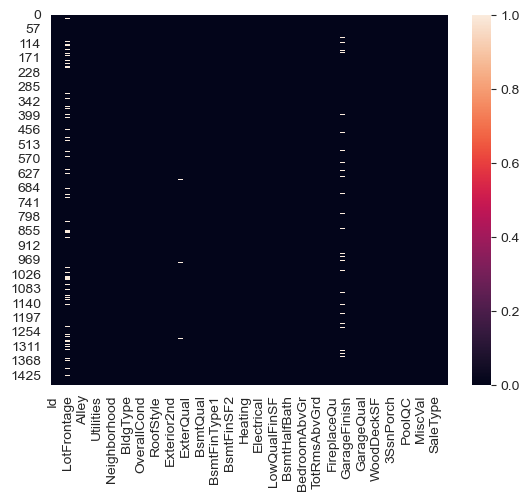

In [35]:
sns.heatmap(df.isnull())

In [36]:
## For numerical col

numerical_nan=[col for col in df.columns if df[col].isnull().sum()>1 and df[col].dtype!='O']
numerical_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [37]:
## Replacing the numerical Missing Values
## We will replace by using median since there are outliers

for col in numerical_nan:
    median=df[col].median()
    df[col].fillna(median,inplace=True)

<Axes: >

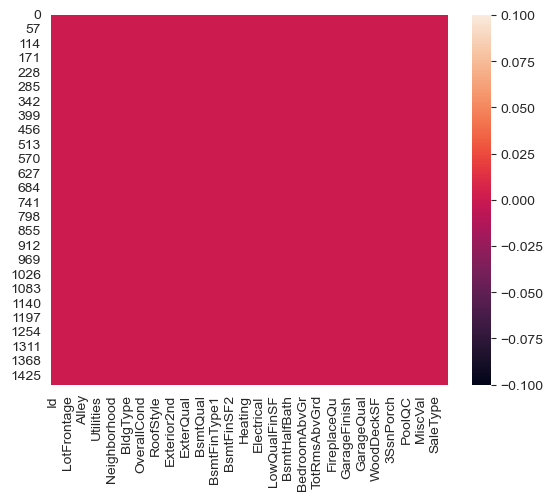

In [38]:
sns.heatmap(df.isnull())

Finally we handled the missing values

In [39]:
## Temporal Variables

for a in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[a]=df['YrSold']-df[a]
    


In [40]:

# to show all  the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [41]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [42]:
## Now needd to take care of the skewed data

num=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for col in num:
    df[col]=np.log(df[col])

In [43]:
## encodeing the categorical variables 
for col in categorical:
    labels=df.groupby([col])['SalePrice'].mean().sort_values().index
    labels={k:i for i,k in enumerate(labels,0)}
    df[col]=df[col].map(labels)

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216


# Feature Scaling

used to transform the features (input variables) of a dataset to a common scale. 

In [45]:
col=[col for col in df.columns if col not in ['Id','SalePrice']]## because Id is useless and SalePrice is dependent Variable

## MinMaxScaler converts the values betweeb 0 to 1 default
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[col])

MinMaxScaler()

In [46]:
#Scaling
scaler.transform(df[col])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [47]:
data = pd.concat([df[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[col]), columns=col)],
                    axis=1)


In [48]:
data.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.5,0.8
1,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.5,0.8
2,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.5,0.8
3,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.5,0.2
4,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.5,0.8


# Feature Selection


In [49]:
df=data.copy()
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.5,0.8
1,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.5,0.8
2,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.5,0.8
3,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.5,0.2
4,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.5,0.8


In [50]:
#split the dependend nad independent variable
X_train=df.drop('SalePrice',axis=1)
y_train=df[['SalePrice']]

In [51]:
#model selecting
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_selection_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_selection_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
selected_feature= X_train.columns[(feature_selection_model.get_support())]
len(selected_feature)

18

In [53]:
#selected column for training the model
selected_feature

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'SaleCondition'],
      dtype='object')

In [54]:
X_train=X_train[selected_feature]
X_train.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
0,0.235294,0.625000,0.666667,0.098361,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.833333,0.666667,0.50,0.8
1,0.000000,0.833333,0.555556,0.524590,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.833333,0.666667,0.50,0.8
2,0.235294,0.625000,0.666667,0.114754,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.50,0.8
3,0.294118,0.708333,0.666667,0.606557,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.333333,0.333333,0.75,0.2
4,0.235294,1.000000,0.777778,0.147541,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.75,0.8


In [55]:
lasso=Lasso(alpha=0.0001)

In [56]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [57]:
train_score = lasso.score(X_train, y_train)

In [58]:
train_score

0.8846871600311241

In [59]:
c=lasso.coef_

In [60]:
c

array([-0.11636801,  0.27802624,  0.53315912, -0.06337813,  0.10361028,
        0.09260632,  0.03921918,  0.11116669,  0.17646972,  1.08976711,
        0.18582886,  0.10877964,  0.07784643,  0.02333998,  0.0257645 ,
        0.0225091 ,  0.18038098,  0.14010119])

In [61]:
x=[0.235294,0.625000,0.666667,0.098361,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.833333,0.666667,0.50,0.8]
x=np.array(x)
x=x.reshape(1,-1)


In [62]:
y=lasso.predict(x)

In [63]:
y= np.exp(y)
print("Predicted Sale Price is {}".format(y))

Predicted Sale Price is [208605.07457107]
